# Mini Capstone Project -  Bank Marketing Analysis

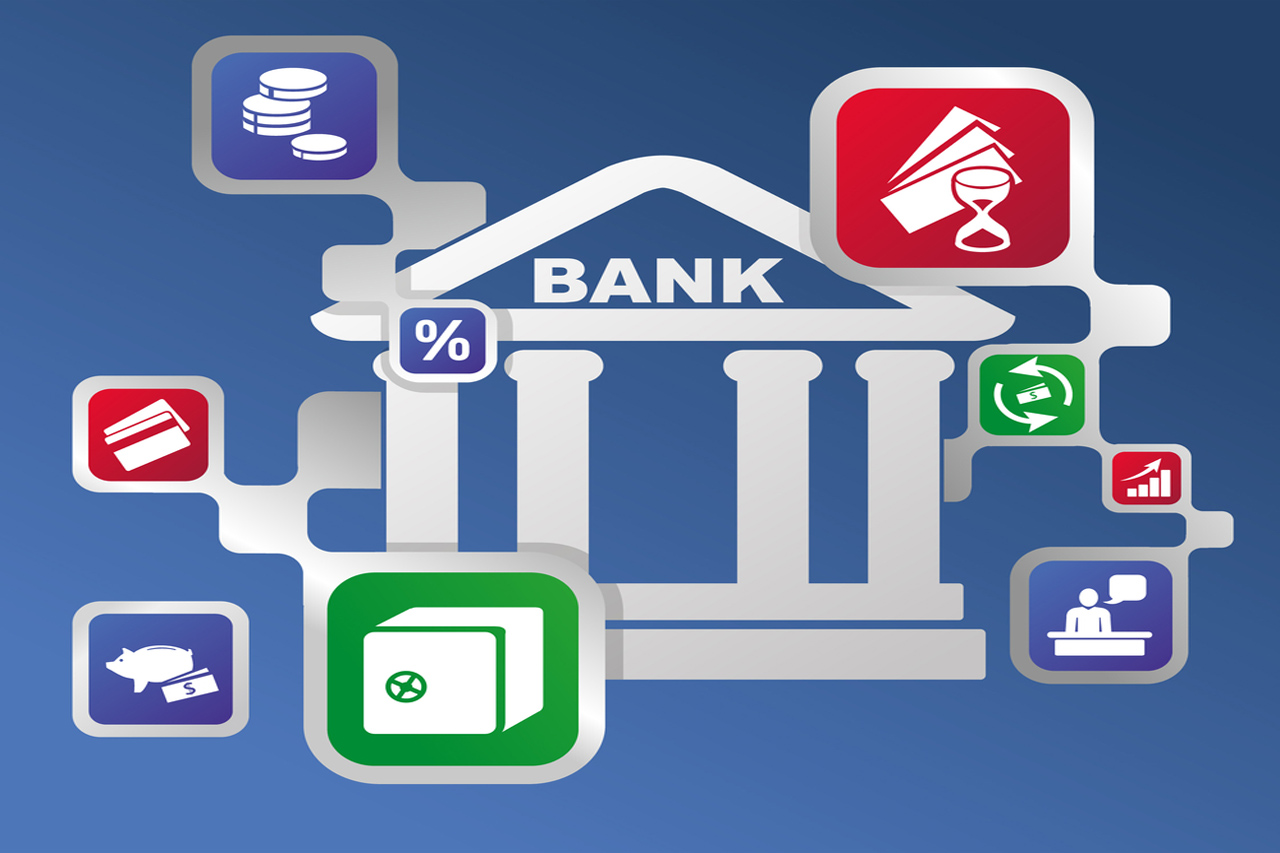

# Introduction

The bank provides financial services such as savings accounts, current accounts, debit cards, etc. to its customers. In order to
increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards,
term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns 
need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit.<br></br>
The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.<br></br>
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

## Term Deposit

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

## Source

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Variables in dataset

| |  Variables  | Type    | Details   | 
|---:|:-------------|:-----------|:------|
| 1 | age  | Numeric       | per capita crime rate by town  | 
| 2 | job  | Categorical   | type of job admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") | 
| 3 | marital  | Categorical    | marital status ("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)   |
| 4 | education  | Categorical    | ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")   | 
| 5 | default  | Categorical   | Does the customer have credit in default? ( "no","yes","unknown")   | 
| 6 | balance  | Numeric    | Amount in account   | 
| 7 | housing  | Categorical    | Does the customer have a housing loan? ("no","yes","unknown")   | 
| 8 | loan  | Categorical    | Does the customer have a personal loan? "no","yes","unknown")   | 
| 9 | contact  | Categorical    | contact communication type ("cellular","telephone")   | 
| 10 | month  | Categorical    | last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")   |      
| 11 | day  | Categorical    | last contacted day  of the month   | 
| 12 | duration  | Numeric    | last contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call ‘y’ is obviously known   |
| 13 | campaign  | Numeric    | Number of contacts performed during this campaign and for this client includes last contact  | 
| 14 | pdays  | Numeric    | Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)   | 
| 15 | previous  | Numeric    | number of contacts performed before this campaign and for this client   | 
| 16 | poutcome  | Categorical    | outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")   |
| 17 | y  | Categorical    | has the client subscribed to a term deposit? ("yes","no")  | 


## Aim

To do exploratory data analysis(EDA) and visualisation of bank marketing dataset.

Also find out which campaign's performance is better than another.(Effectiveness of Campaign)

# **Pipeline of Bank Marketing Analysis (EDA) :**<br>

* **Basic Exploration**
* **Checking missing values**
* **Distribution of Numerical Variables**
* **Checking Outliers**
* **Checking Skewness**
* **Feature Engineering**
* **Transformation**
* **Distribution of Categorical variables**
* **Categorial vs Numerical variables**
* **Categorical Variables vs y variable¶**
* **Campaign 1 visualisation**
* **Campaign 2 Visualisation**
* **Campaign Performance**
* **Campaign_1_failure and campaign_2_no_response**

### Importing Libraries

In [1]:
# for analysis of data importing necessary libraries
import pandas as pd # for data amalysis
import numpy as np   # for numerical analysis / calculation 
import matplotlib.pyplot as plt   # data visualisation
import seaborn as sns    # data visualisation
# Displays output inline
%matplotlib inline     
import missingno as msno  # for getting graphs of missing numbers
from scipy.stats import boxcox, skew  # for finding skewness 

In [2]:
# import warning library
import warnings
warnings.filterwarnings("ignore")

## Basic Exploration

### Reading Train Data

In [3]:
train = pd.read_csv("train.csv",sep=';')   # reading the train dataset using pandas and  use separater

### Shape of Train Data

In [4]:
train.shape  # use for getting number of observations(rows) and variables(columns) in train dataset

(45211, 17)

**Obervation :**<br>
* number of observations(rows) in train dataset = 45211
* number of variables(columns) in train dataset = 17

### Reading Train Data

In [5]:
test = pd.read_csv("test.csv",sep=';')   # reading the test  dataset using pandas and use separater

### Shape of Train Data

In [6]:
test.shape  # use for getting number of observations(rows) and variables(columns) in test  dataset

(4521, 17)

**Obervation :**<br>
* number of observations(rows) in test dataset = 4521

* number of variables(columns) in test dataset = 17

### Concatenating Train Data and Test Data

In [7]:
bank_mrkting = pd.concat([train,test],ignore_index=True)  # reading the bank_mrkting dataset using pandas  after concate 

In [8]:
bank_mrkting.shape    # use for getting number of observations(rows) and variables(columns) in bank_mrkting dataset

(49732, 17)

**Obervation :**<br>
* number of observations(rows) in train bank_mrkting = 49732
* number of variables(columns) in bank_mrkting dataset = 17

### Inspection of bank_mrkting

In [9]:
bank_mrkting.head()  # reading the 1st 5 rows

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [10]:
bank_mrkting.tail()  # reading the last 5 rows

age            job  marital  education default  balance housing loan  \
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  day month  duration  campaign  pdays  previous poutcome   y  
49727  cellular   30   jul       329         5     -1         0  unknown  no  
49728   unknown    9   may       153         1     -1         0  unknown  no  
49729  cellular   19   aug       151        11     -1         0  unknown  no  
49730  cellular    6   feb       129         4    211         3    other  no  
49731  cellular    3   apr       345         2    249         7    other  no

### Dropping Duplicates

In [11]:
bank_mrkting = bank_mrkting.drop_duplicates()   # dropping the dublicates from the bank_mrkting dataset

###  Shape After Dropping Duplicates

In [12]:
bank_mrkting.shape   # after dropping dublicates getting number of observations(rows) and variables(columns) in bank_mrkting dataset

(45211, 17)

**Obervation :**<br>
* number of observations(rows) in train bank_mrkting = 45211
* number of variables(columns) in bank_mrkting dataset = 17

###  General Information Of The Data

In [13]:
bank_mrkting.info()  # for getting information of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


**Obervation :**<br>
* objects variables = 10 
* numericals variables = 7

### Number of Unique Values in the bank_mrkting

In [14]:
bank_mrkting.nunique()   # getting unique values 

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### Converting Columns  Object to Category

In [15]:
col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome','y']  # columns for conversion 
bank_mrkting[col] = bank_mrkting[col].astype('category')  # converting columns into category because day column given numerical

In [16]:
bank_mrkting.info()   # get detail information of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  category
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(11), int64(6)
memory usage: 2.9 MB


**Obervation :**<br>
here , 
* categorical variables = 11 
* numerical = 6

### Summary  for  numerical variables

In [17]:
bank_mrkting.describe()      # use for getting summary in the form of mean , standard deviation , min ,max , count

age        balance      duration      campaign         pdays  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058    258.163080      2.763841     40.197828   
std       10.618762    3044.765829    257.527812      3.098021    100.128746   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      72.000000    103.000000      1.000000     -1.000000   
50%       39.000000     448.000000    180.000000      2.000000     -1.000000   
75%       48.000000    1428.000000    319.000000      3.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  45211.000000  
mean       0.580323  
std        2.303441  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000

###  Summary  for  categorical variables

In [18]:
bank_mrkting.describe(include='category')  # getting summary of categorical variables

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

          day  month poutcome      y  
count   45211  45211    45211  45211  
unique     31     12        4      2  
top        20    may  unknown     no  
freq     2752  13766    36959  39922

##  Checking missing values

In [19]:
bank_mrkting.isnull().sum()   # user for getting sum of all missing values for each column

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Obervation :**<br>

* No missing values in the dataset

###  Checking missing values by graph

<AxesSubplot:>

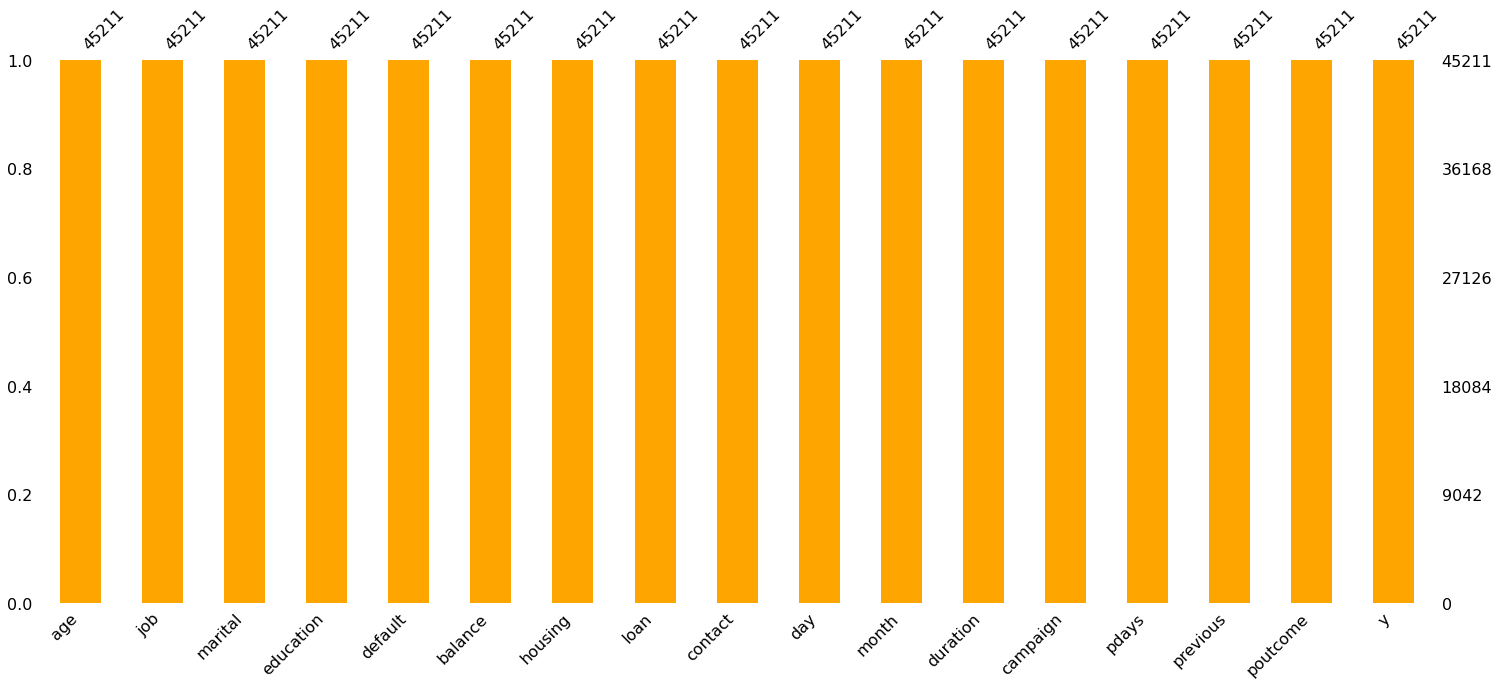

In [20]:
msno.bar(bank_mrkting , color = 'orange')    # show missing values in the form of graph

**Obervation :**<br>
* No missing values

### Filter Features Based on Datatypes

In [21]:
cats = bank_mrkting.select_dtypes('category').columns  #  separating  categorical variables in cats 
nums = bank_mrkting.select_dtypes('number').columns    #  separating  numerical variables in nums

## Distribution of Numerical Variables

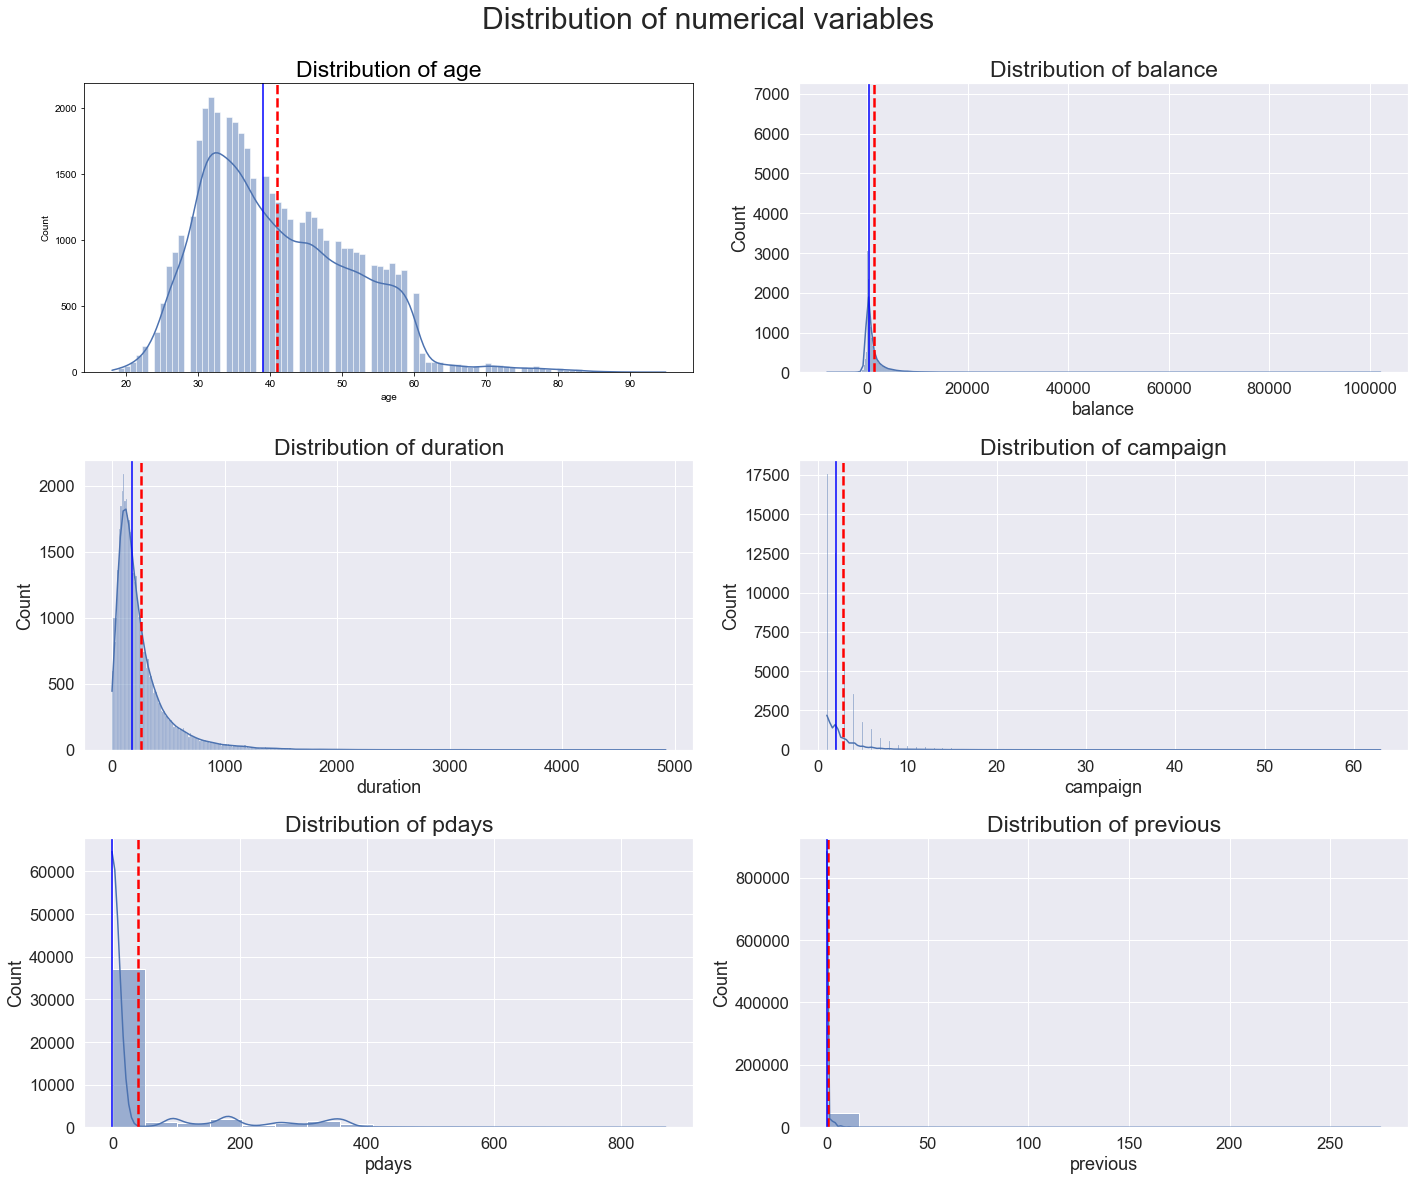

In [22]:
n=1
plt.subplots(figsize=(20, 16))            # plotting subplots
for i in nums:                            # use of for loop for getting subplots
    plt.subplot(3,2,n)   # plot subplots in rows and columns
    ax = plt.gca()           #  Get current axes
    sns.set(font_scale = 1.5)    # giving scales to fonts
    sns.histplot(bank_mrkting[i],kde=True, palette='deep')    # plot histograph
    ax.set_title('Distribution of %s'%(i), fontsize=23)       # giving title
    plt.axvline(x=bank_mrkting[i].mean(),ls='--',lw=2.5, color='red',label='mean')  # show mean 
    plt.axvline(x=bank_mrkting[i].median(), color='blue',label='medain')   # show median 
    n+=1 
    plt.tight_layout()    # figure tightness/compactness
plt.suptitle('Distribution of numerical variables', y=1.03, fontsize=30)  # title to whole histo plot
plt.show()  # show plot

**Obervation :**<br>
* Age is moderately skewed.
* All oythers are highly skewed.

##   Checking Outliers

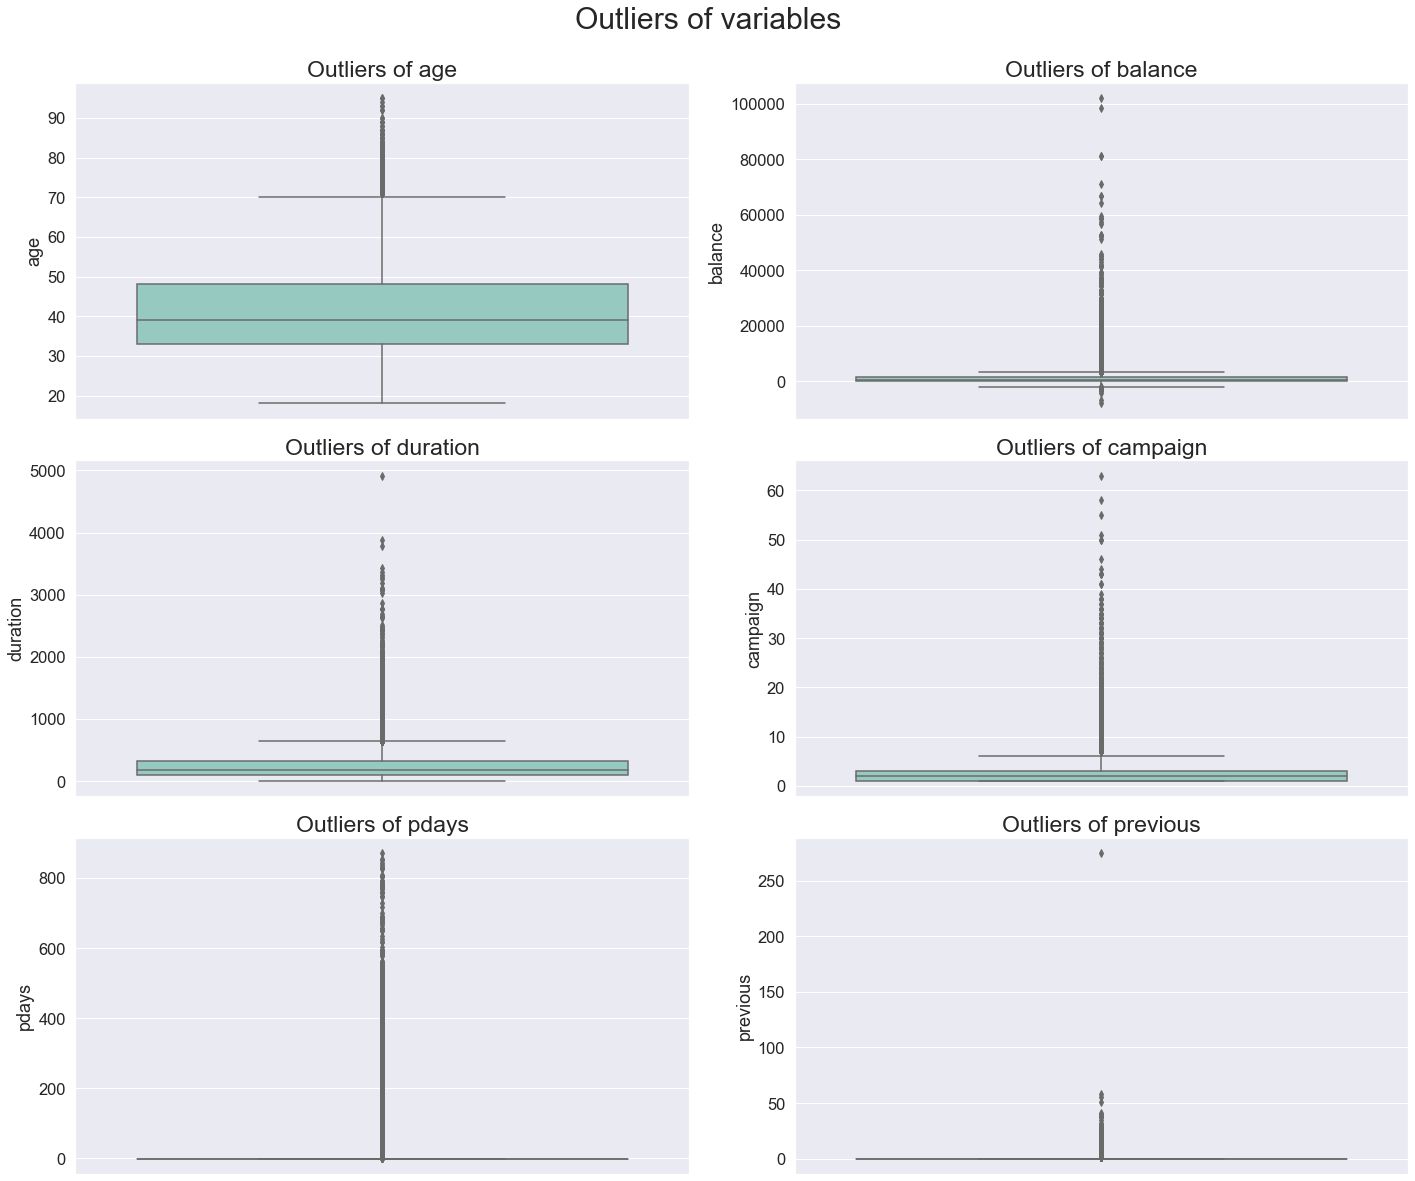

In [23]:
n=1
plt.subplots(figsize=(20, 16))             # plotting subplots
for i in nums:                             # use for loop for getting subplots
    plt.subplot(3,2,n)            # sub plots in rows and columns
    ax = plt.gca()                  # getting current axes
    sns.set(font_scale = 1.5)       #  giving scales to fonts 
    sns.boxplot(y=bank_mrkting[i], palette='Set3')    # plotting boxplot
    ax.set_title('Outliers of %s'%(i), fontsize=23)  # give title to boxplot
    n+=1 
    plt.tight_layout()  ## figure tightness/compactness
plt.suptitle('Outliers of variables', y=1.03, fontsize=30)  # give title to whole plot
plt.show() # show plot

**Obervation :**<br>
* Lots of Outlier present in the dataset
* All numerical variables are skewed and needed transformation

# Checking Skewness of numerical variables

###  See Skewness by plot

<AxesSubplot:>

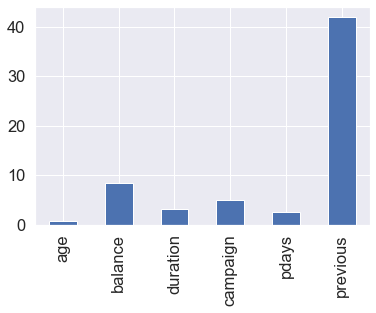

In [24]:
bank_mrkting.skew(numeric_only = True).plot(kind = 'bar')  # plot bar plot give skeweness

**Obervation :**<br>
* Previous Variable has high skewness

### Finding skewness

In [25]:
bank_mrkting[nums].skew()  # # getting skewness

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

**Obervation :**<br>
* Previous Variable has high skewness

## Feature Engineering   

In [26]:
bank_mrkting_n = bank_mrkting.copy(deep = True)  # copy data
bank_mrkting_n['pdays'] = bank_mrkting_n['pdays'].replace(-1, np.nan)  # replcae -1 eith nan
bank_mrkting_n['previous'] = bank_mrkting_n['previous'].replace(0, np.nan)   # replcae 0 eith nan
bank_mrkting_n.loc[bank_mrkting_n['pdays'] > 500, 'pdays'] = 500   # for reduce skewness , values greater than 500 = 500
bank_mrkting_n.loc[bank_mrkting_n['balance'] < 0, 'balance'] = 2  # for reduce skewness , values less than 0 = 2
bank_mrkting_n.loc[bank_mrkting_n['campaign'] > 20, 'campaign'] = 20  # for reduce skewness , values greater than 20 = 20
bank_mrkting_n.loc[bank_mrkting_n['previous'] > 9, 'previous'] = 9   # for reduce skewness , values greater than 9 = 9

## Transformation

We are having highly skewed data. If there are too much skewness in the data, then many statistical model don't work properly.
So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect 
the model's performance.

So, for reducing the skewness **Transformation** is used. Transformation can be done by **Square root(sqrt)** transformation, 
**Cube root(cbrt)** transformation, **Log** transformation, **Boxcox** transormation and many others.

### Log Transformation

In [27]:
bank_log = bank_mrkting_n.copy(deep=True)  # copy the data
for i in nums:  # use for loop for lop values of all numeric
    bank_log[i] = np.log(bank_log[i]+1)   #use log transformation 
bank_log[nums].skew()  # getting skweness

age         0.112757
balance    -0.793077
duration   -0.454164
campaign    1.228159
pdays      -2.372733
previous    0.639606
dtype: float64

### Square root Transformtion 

In [28]:
bank_sqrt = bank_mrkting_n.copy(deep=True)  # copy the data
for i in nums:  # use for loop for sqrt values of all numeric
    bank_sqrt[i] = np.sqrt(bank_sqrt[i])  # squre root transformation
bank_sqrt[nums].skew()  # getting skweness

age         0.382202
balance     1.889859
duration    1.173744
campaign    1.857731
pdays      -0.471006
previous    0.891399
dtype: float64

### Cube root Transformation

In [29]:
bank_cbrt = bank_mrkting_n.copy(deep=True)  # copy the data
for i in nums:    # use for loop for cube root values of all numeric
    bank_cbrt[i] = np.cbrt(bank_cbrt[i])  #  cube root transformation
bank_cbrt[nums].skew() # getting skweness

age         0.286500
balance     0.736061
duration    0.640146
campaign    1.456266
pdays      -0.900948
previous    0.713759
dtype: float64

**Obervation :**<br>
* Here **Cube root(cbrt) transformation** is overall performing better compare to other transformation methods.

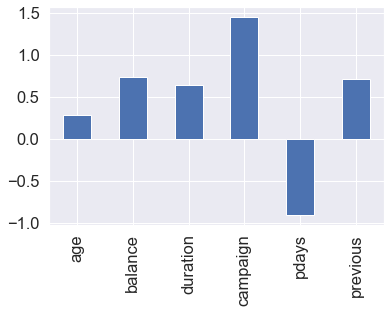

In [30]:
bank_cbrt.skew(numeric_only = True).plot(kind = 'bar');  # bar plot showing skewness

**Obervation :**<br>
* Here **Cube root(cbrt) transformation** reduce skewness of variables as compare to earliear

###  Distribution of Variables after Transformation

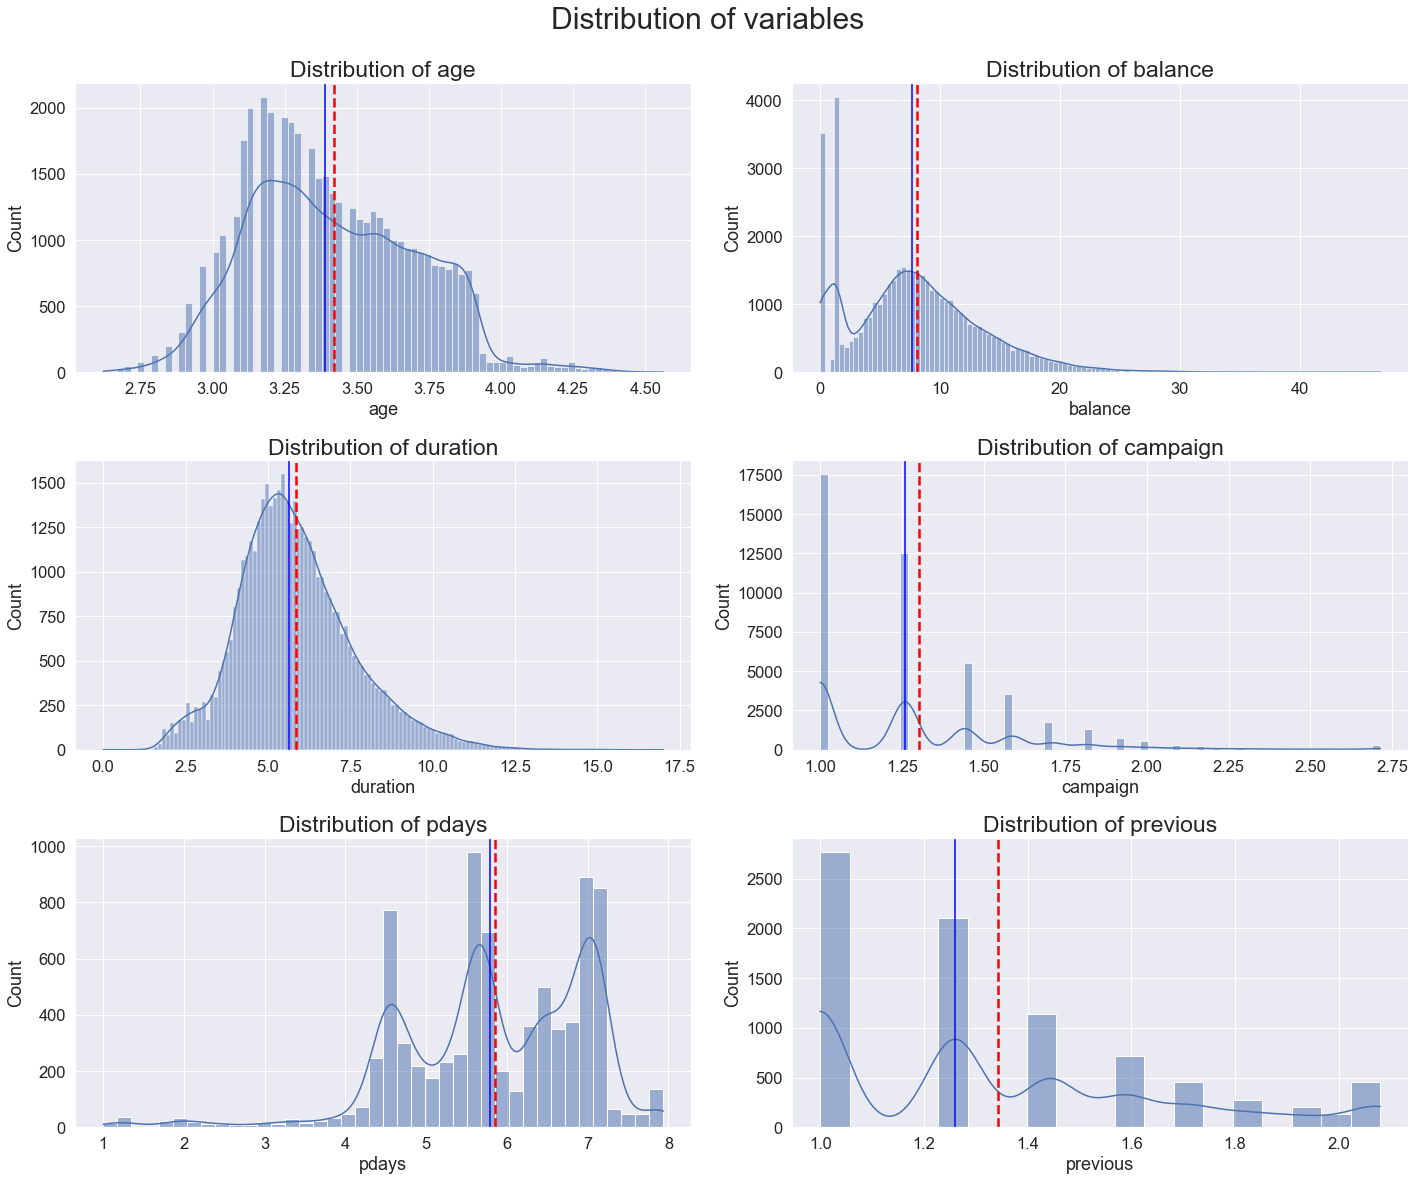

In [31]:
n=1
plt.subplots(figsize=(20, 16))     # subplots figure size
for i in nums:                    # use for loop for getting suplots
    plt.subplot(3,2,n)      # getting number  of subplots in rows and columns
    ax = plt.gca()       # get current axes
    sns.set(font_scale = 1.5)     # get scale of fonts
    sns.histplot(bank_cbrt[i],kde=True, palette='Set3')    # histoplot
    ax.set_title('Distribution of %s'%(i), fontsize=23)  # title of histoplot
    plt.axvline(x=bank_cbrt[i].mean(),ls='--',lw=2.5, color='red',label='mean')  # show mean in plot
    plt.axvline(x=bank_cbrt[i].median(), color='blue',label='medain')  # show median in plot
    n+=1 
    plt.tight_layout()   # figure tightness/compactness
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)  # title to whole subplot
plt.show()  # show plot

**Obervation :**<br>
* Here After **Cube root(cbrt) transformation**, 
* **Age** variable become statistically symmetrical.
* **Balance**, **Duration**, **Pdays**, **Previous** variables become  moderately statistically symmetrical.

### Outliers after Transformation

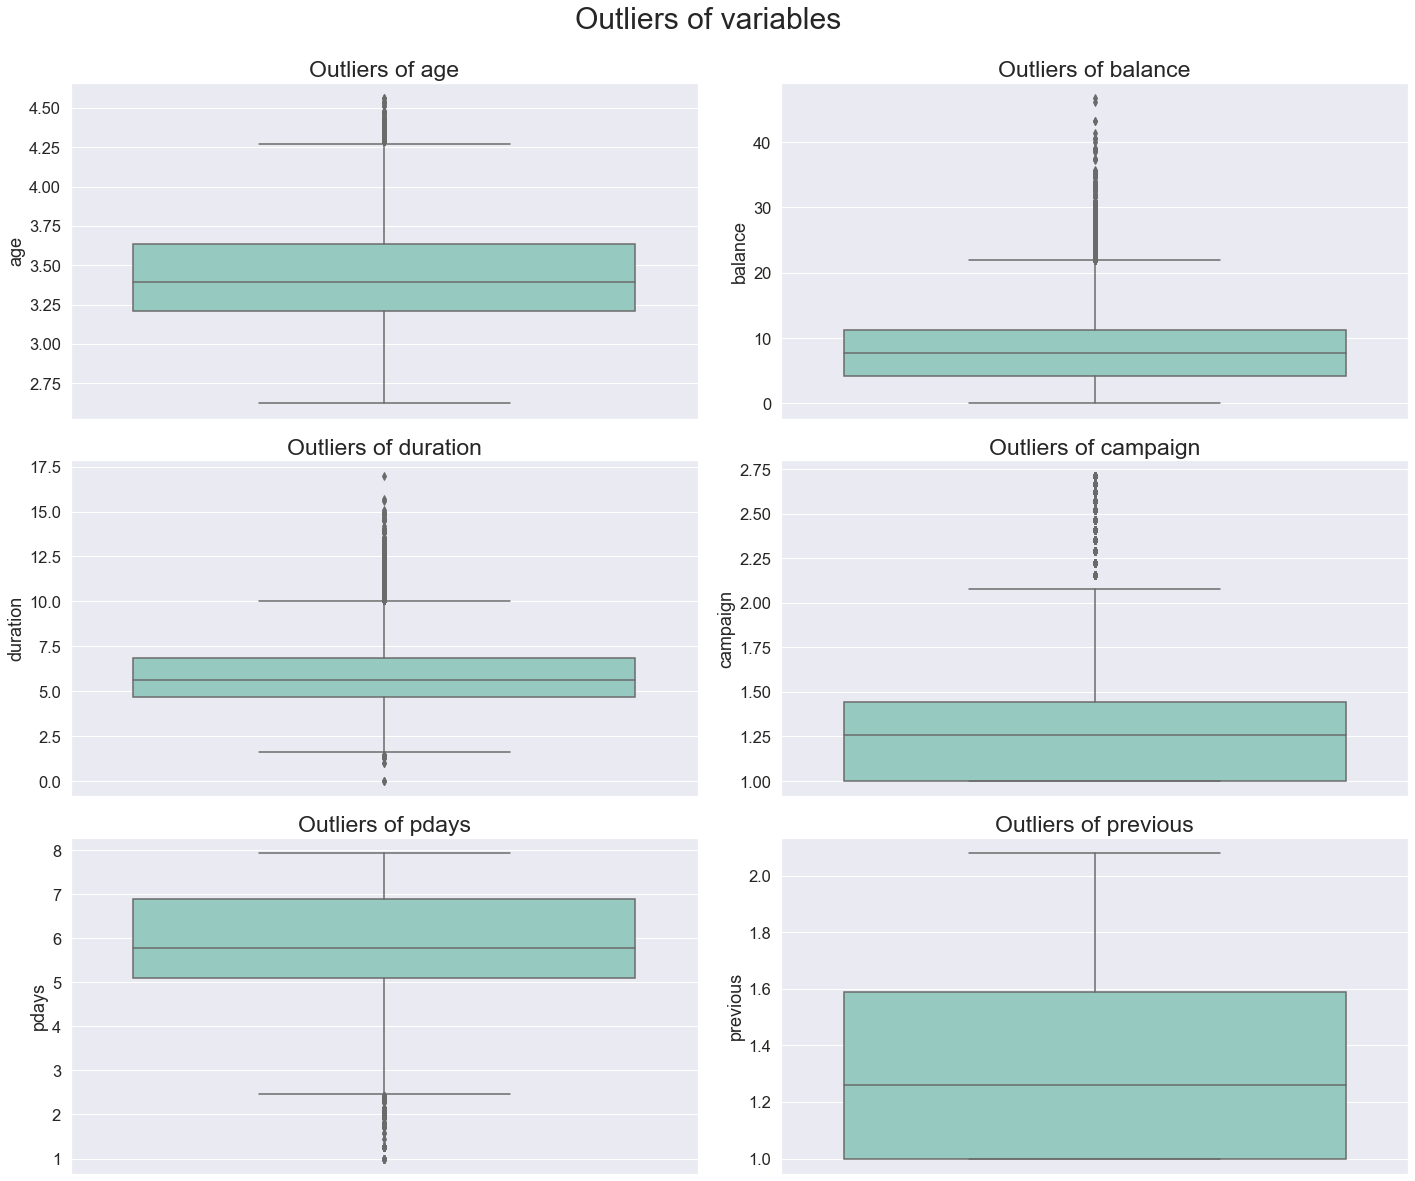

In [32]:
n=1
plt.subplots(figsize=(20, 16))    # figure size for subplots
for i in nums:                # for loop for getting subplots
    plt.subplot(3,2,n)    # number of subplots in row and column
    ax = plt.gca()  # get current axes 
    sns.set(font_scale = 1.5)  #  get scale for fonts
    sns.boxplot(y=bank_cbrt[i], palette='Set3')     # box plot 
    ax.set_title('Outliers of %s'%(i), fontsize=23)  # title to box plot
    n+=1 
    plt.tight_layout()  # figure tightness/compactness
plt.suptitle('Outliers of variables', y=1.03, fontsize=30)  # title to whole plot
plt.show()  # show plot 

**Obervation :**<br>
* As we can see here, skewness and the outliers are decreased after applying Cuberoot transformation.


##  Distribution of Categorical Variables

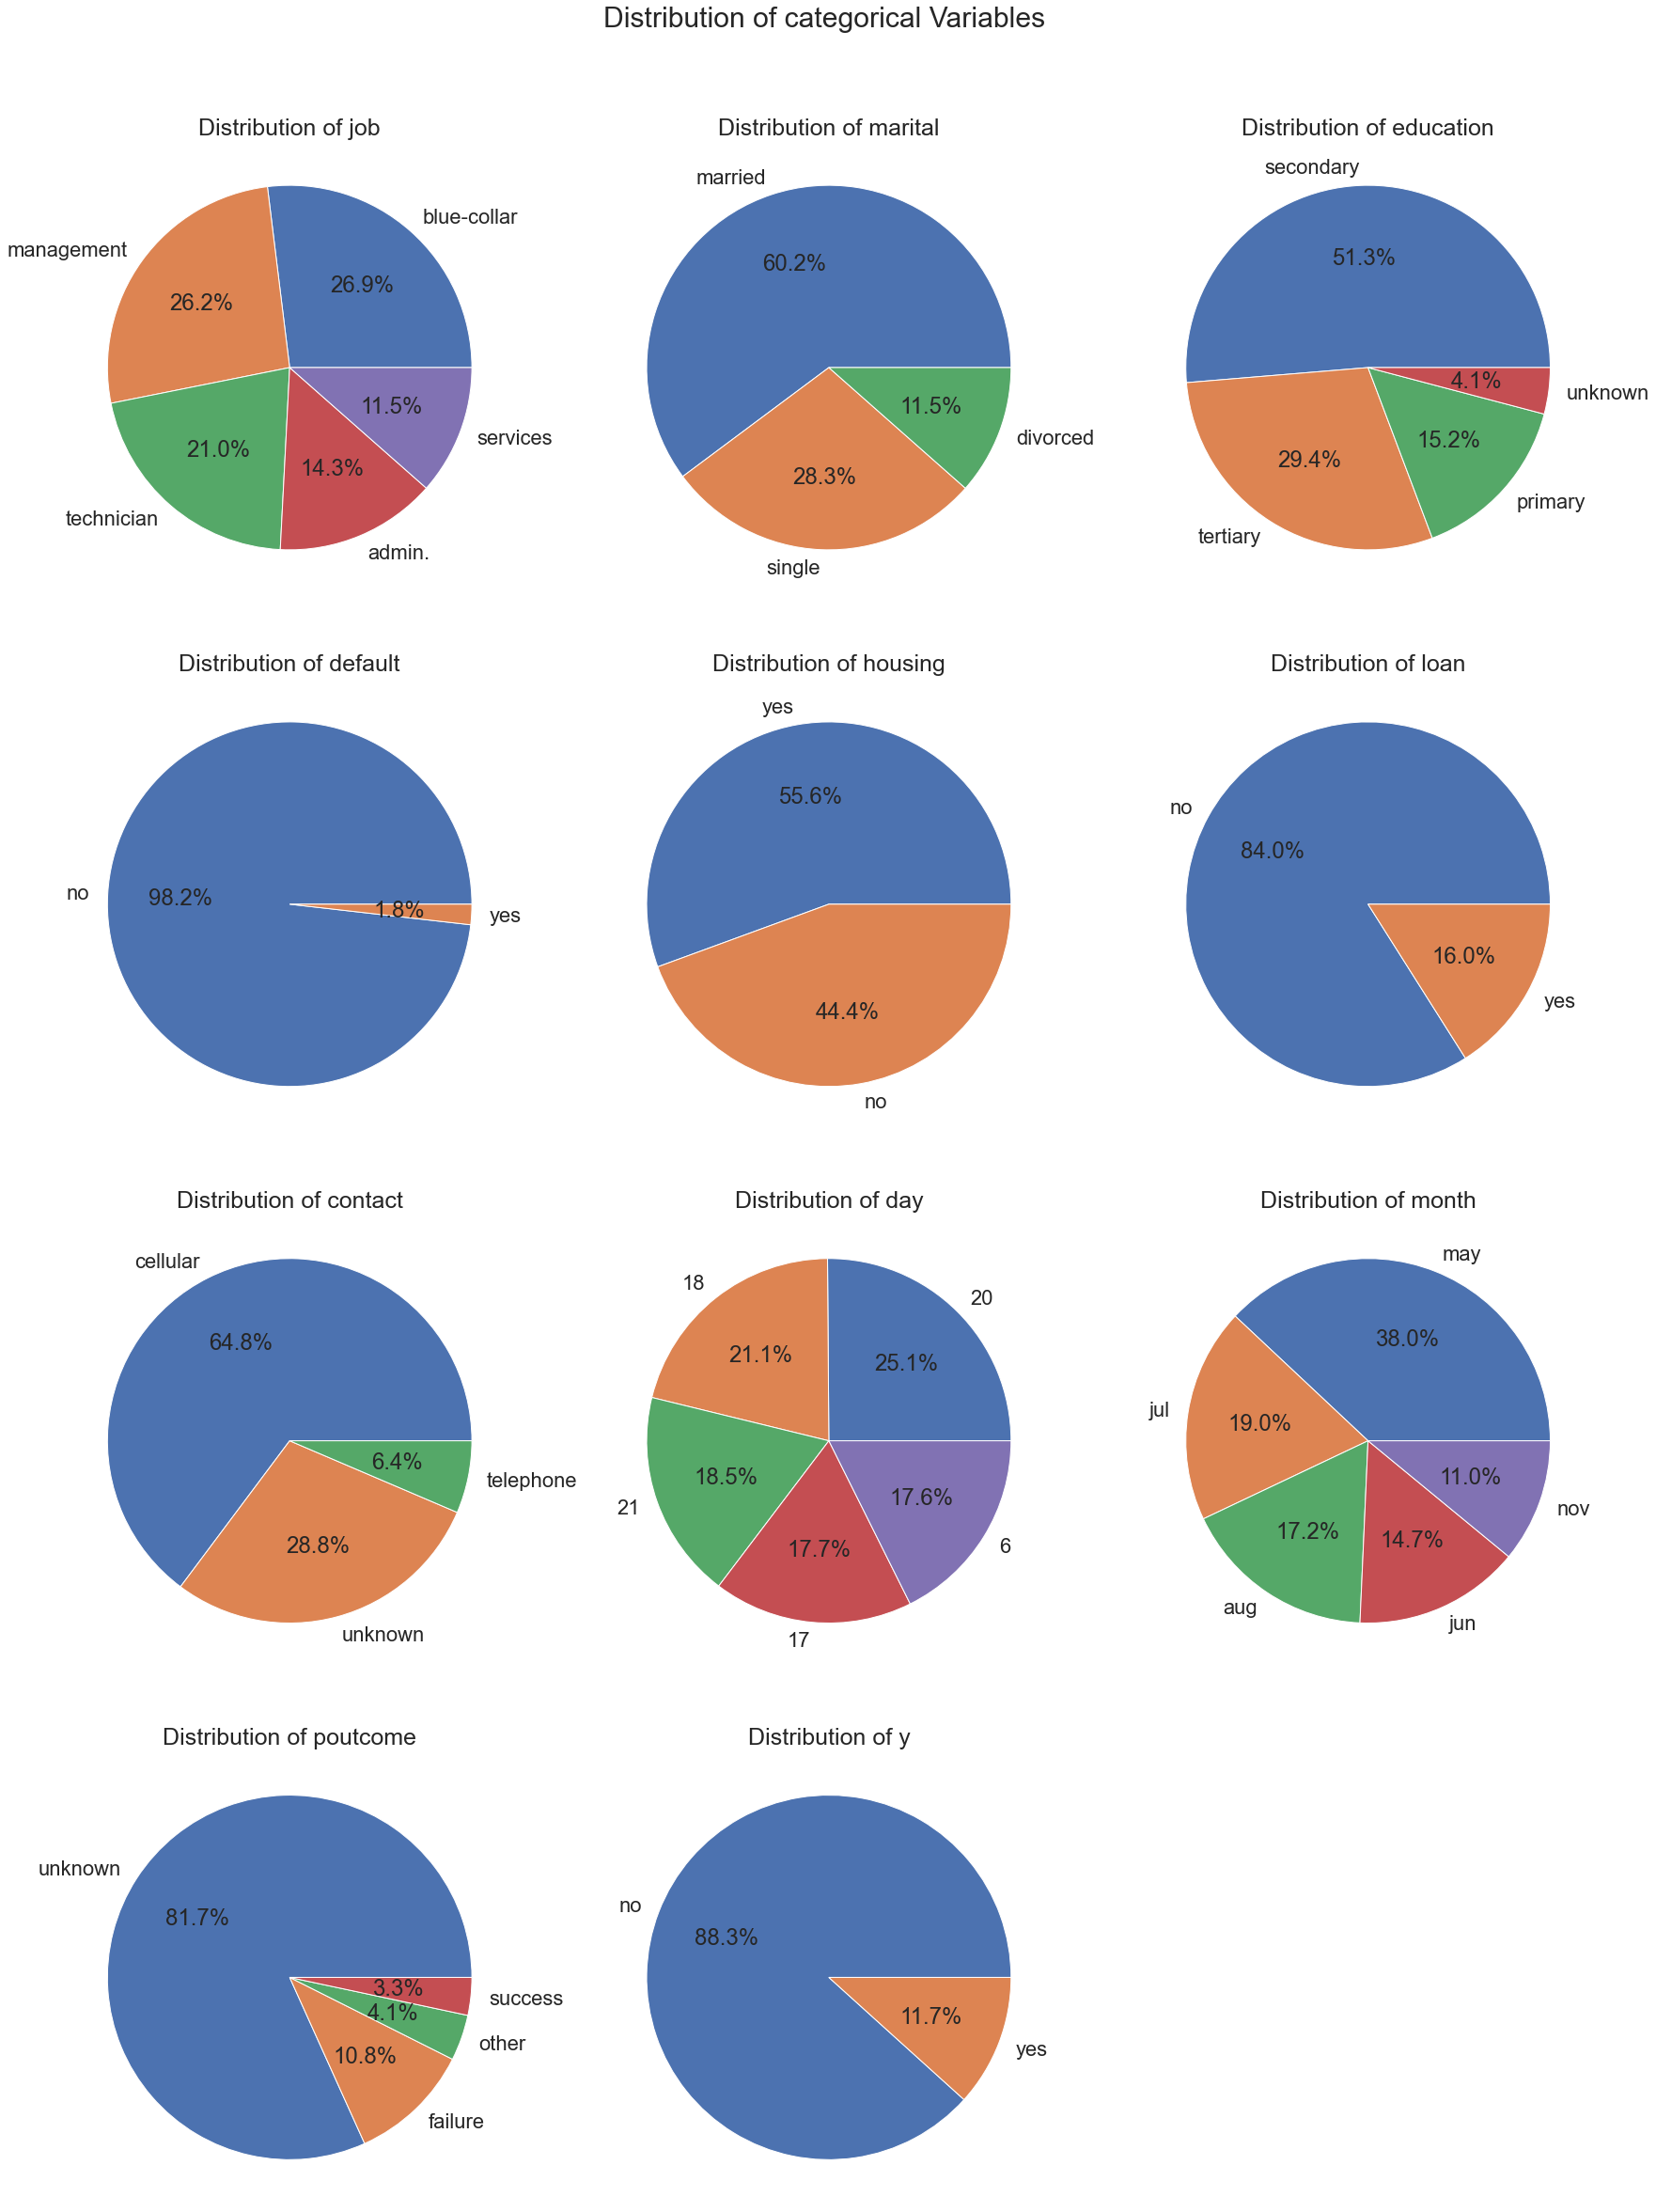

In [33]:
count = 1
plt.subplots(figsize = (25,40))   # figure size of  subplot
for i in cats:    # for loop gor getting subplots
    plt.subplot(5, 3, count)     # sub plot numbers in rows and columns
    ax = plt.gca()        # get current axes
    sns.set(font_scale = 2)  # get scale for fonts
    plt.pie(bank_mrkting[i].value_counts().values[:5], labels=bank_mrkting[i].value_counts().index[:5], autopct='%1.1f%%')# pie plot
    ax.set_title('Distribution of %s'%(i), fontsize = 25)  # title to each plot
    count += 1
    plt.tight_layout()  # figure tightness/compactness
plt.suptitle('Distribution of categorical Variables ', y = 1.03, fontsize = 30)  # title to whole plot
plt.show() # show plot

**Observations :**<br>
* Job : Blue Collar, Management, Technichian jobs are in higher percent.
* Marital : Married clients are in high number.
* Education : Secondary education clients are high.
* Default : By default who doesn't have loan are high.
* Housing : Most no of clients have house loan.
* Loan : Most no of clients doesn't have personal  loan
* Poutcome : did not participate in previous campaigns are high.
* Contact : Clients mostly have cellular contact.
* Day : Most of the days are 20, 18, 21
* Month : Most of the months are May, July, August.
* Poutcome : did not participate in previous campaigns are high.
* y : Most of clients not subscribed to term deposit.

## Categorical  Variables Vs Numerical Variables

### Categorical  Variables Vs Age

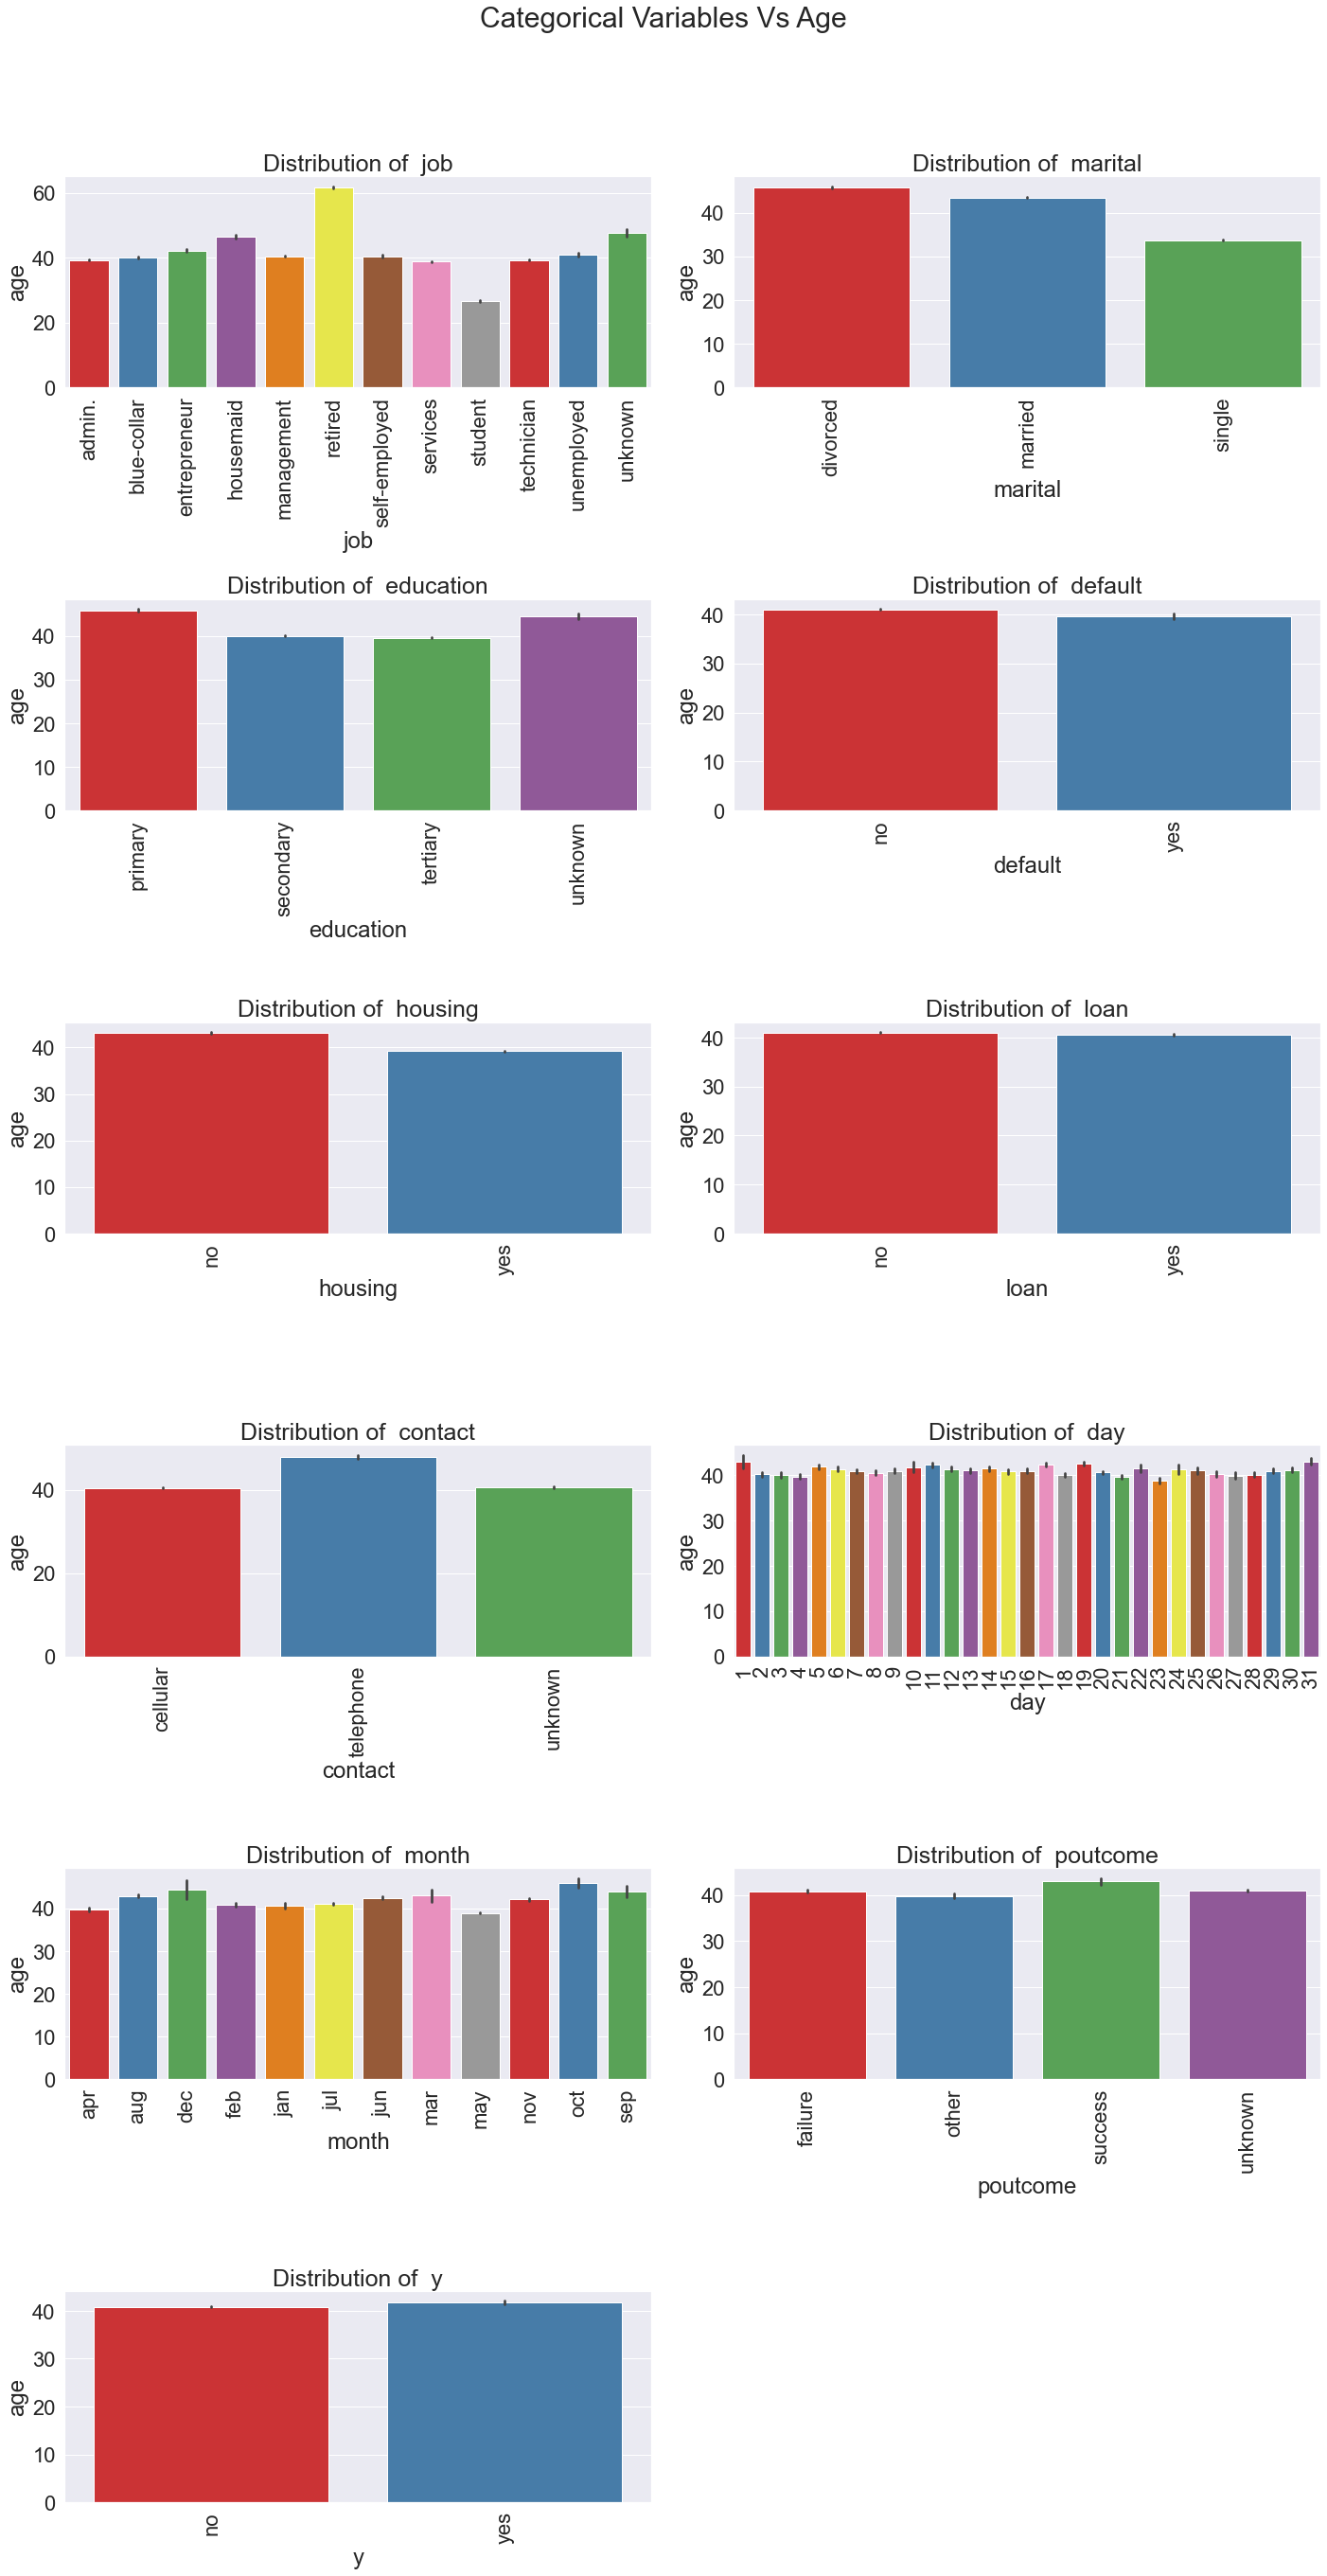

In [34]:
count = 1
plt.subplots(figsize = (20,60))  # figure  size of subplots
for i in cats:      # for loop for getting subplots
    plt.subplot(10, 2, count)    # subplots in rows and columns
    ax = plt.gca()                # get  current axes
    sns.set(font_scale = 2)     # get scale for fonts 
    sns.barplot(x =bank_mrkting[i], y=bank_mrkting['age'], palette='Set1') # bar plor 
    plt.xticks(rotation=90)   # rotation of x axis names to 90 degrees /horizontal
    ax.set_title('Distribution of  %s'%(i), fontsize = 25)  # title to each plot
    count += 1
    plt.tight_layout()  # figure tightness/compactness
plt.suptitle('Categorical Variables Vs Age', y = 1.03, fontsize = 30)# title to whole plot
plt.show() # show plot 

**Observations :**<br>
**Categorical Vs Age :**<br>
* Job : clients which are retired, unknown and housemaid are in high age.
* Marital : Divorced clients are in high age.
* Education : Primary educated clients have high age.
* Default : By default who doesn't have loan are high age.
* Housing : Most no of clients having no house loan have high age.
* Loan : Most no of clients doesn't have personal  loan and those have loan have same age.
* Contact : Most no of clients having telephone contact have high age.
* Day : No of clients come on 1 and 31 day have high age.
* Month : No of clients come on December and October month have high age.
* Poutcome : Clients Success in previous campaigns have high age.
* y : Clients subscribed to term deposit have high age.

###  Categorical Variables Vs Balance

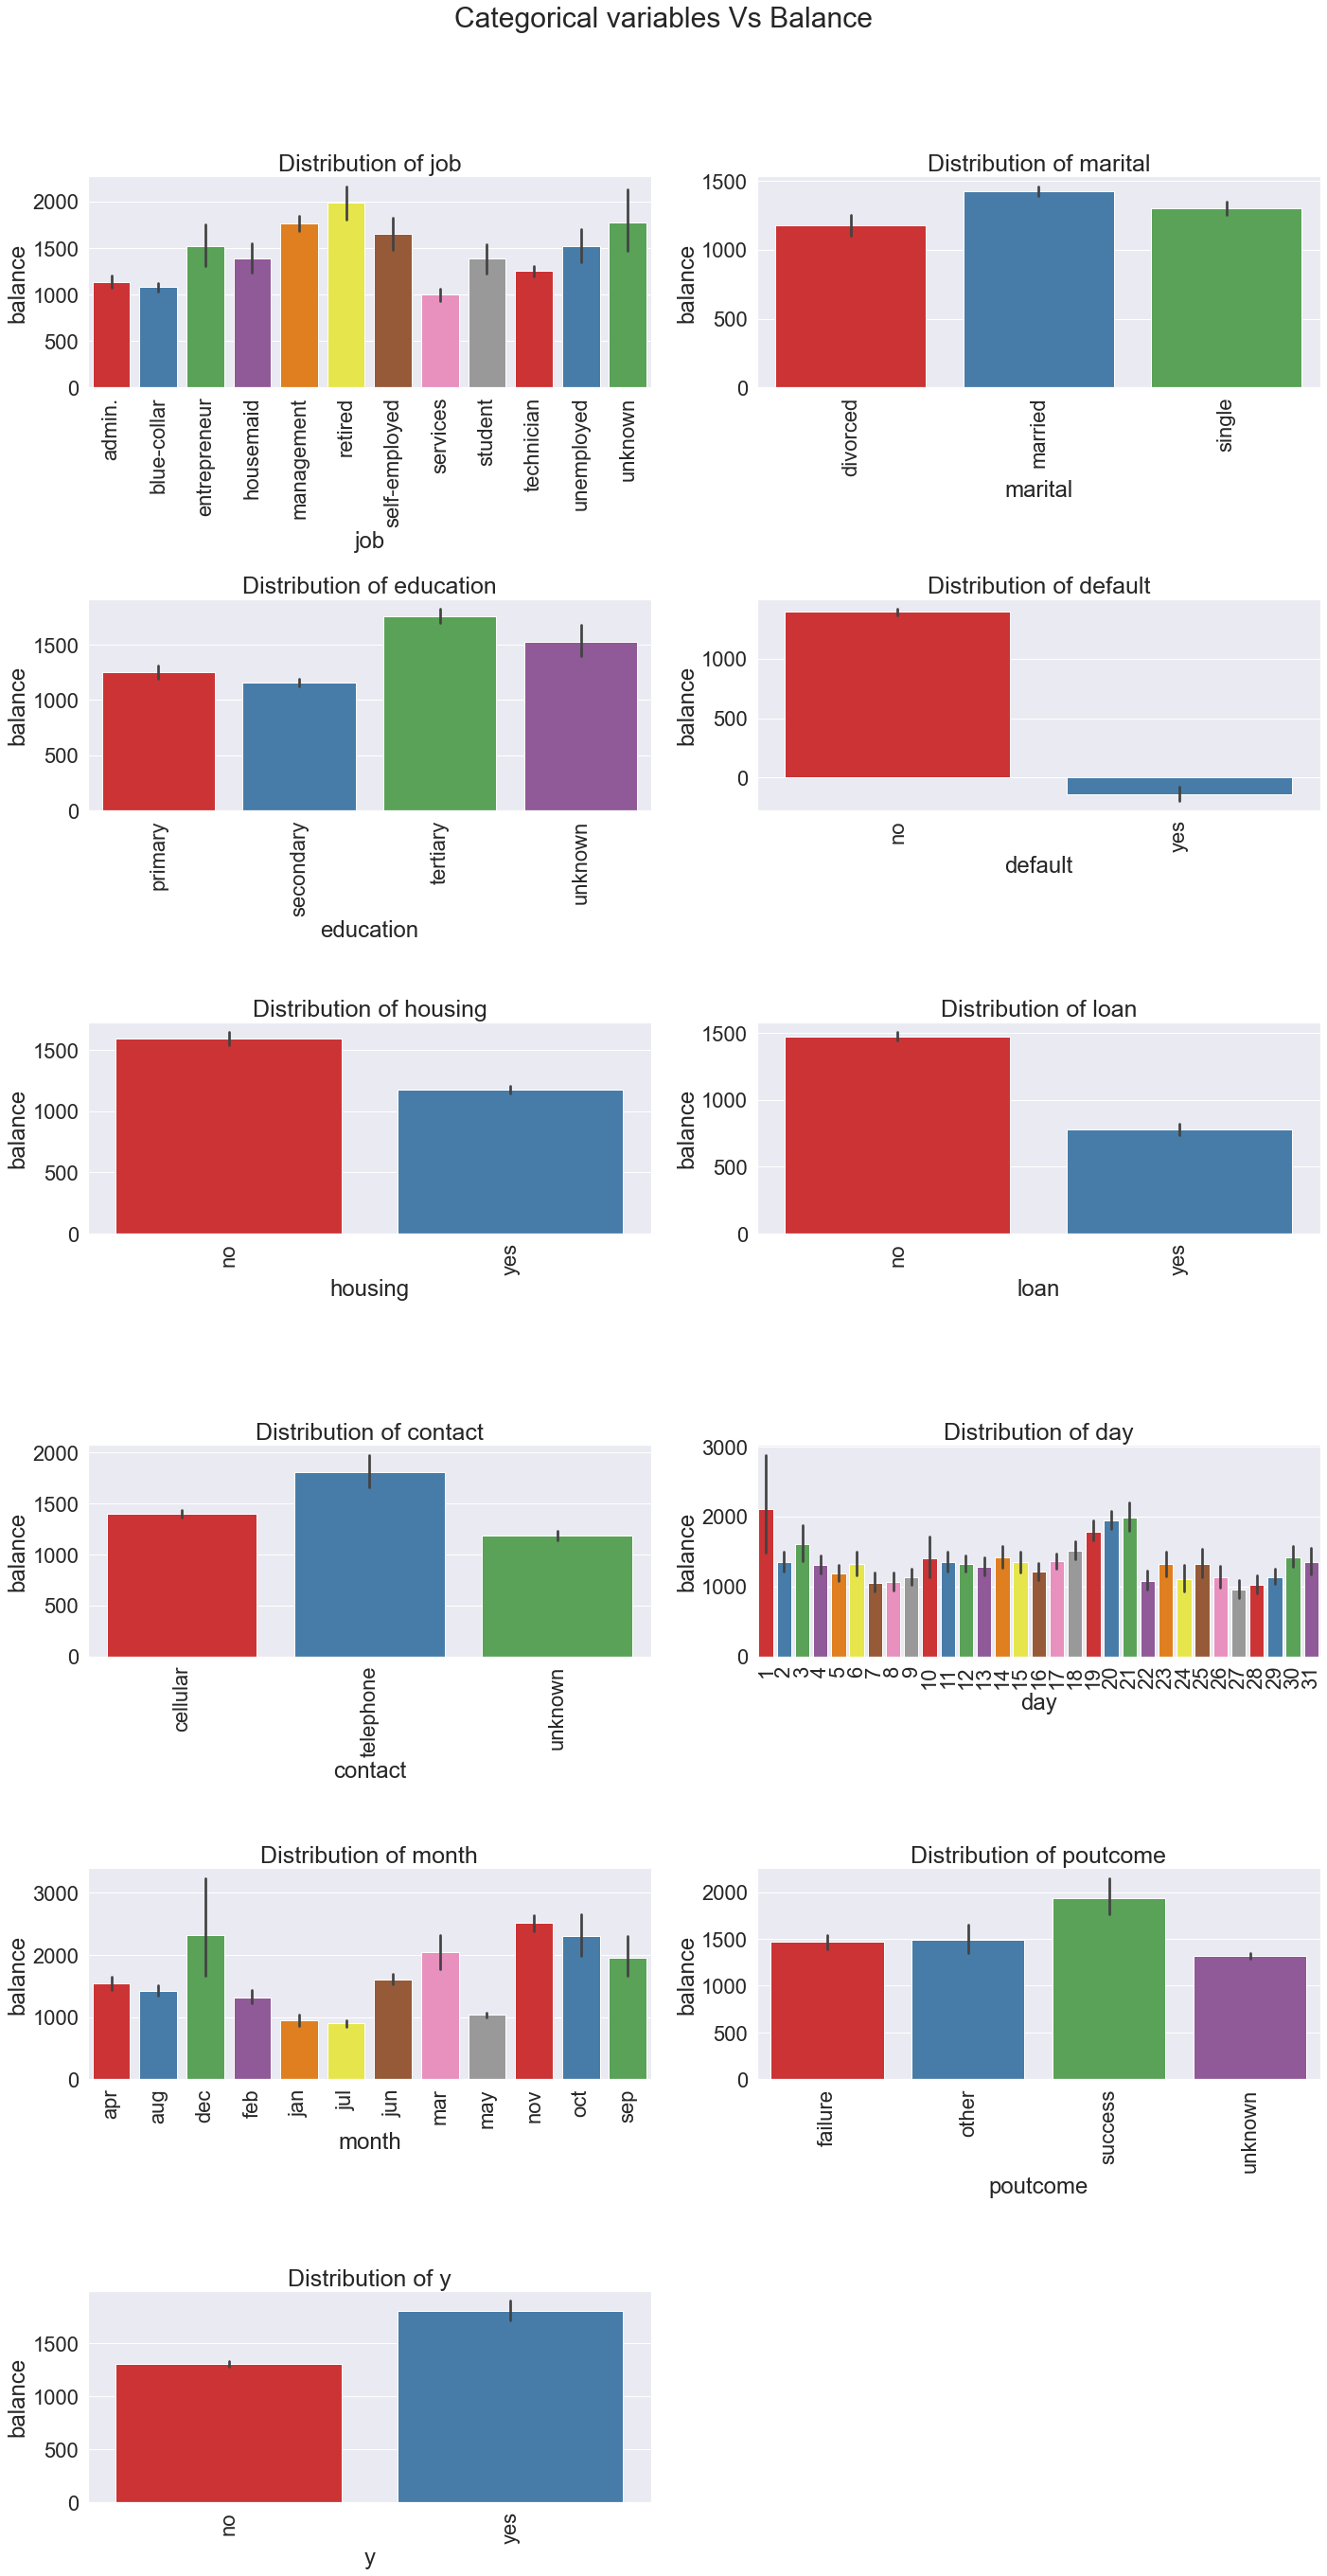

In [35]:
count = 1
plt.subplots(figsize = (20,60))   # figure size of subplots
for i in cats:    # for loop for geetinf subplots
    plt.subplot(10, 2, count)  #  subplots in row , columns 
    ax = plt.gca()          # get current axes
    sns.set(font_scale = 2)   # get scale for fonts 
    sns.barplot(x =bank_mrkting[i], y=bank_mrkting['balance'], palette='Set1')   # bar plot
    plt.xticks(rotation=90)  # rotate names to x axis to horizontal
    ax.set_title('Distribution of %s'%(i), fontsize = 25)  # title to each plot
    count += 1
    plt.tight_layout()  # figure tightness/compactness
plt.suptitle('Categorical variables Vs Balance', y = 1.03, fontsize = 30)  # title to whole plot
plt.show() # show plot

**Observations :**<br>
**Categorical Vs Balance :**<br>
* Job : clients which are retired, unknown and management have high balance.
* Marital : Married clients have high balance.
* Education : Tertiary educated clients have high balance.
* Default : By default who doesn't have loan have high balance.
* Housing : Most no of clients having no house loan have high balance.
* Loan : Most no of clients doesn't have personal  loan having high balance.
* Contact : Most no of clients having telephone contact have high balance.
* Day : No of clients come on 1, 20,21 day have high balance.
* Month : No of clients come on November and October month have high balance.
* Poutcome : Clients Success in previous campaigns have high balance.
* y : Clients subscribed to term deposit have high balance.

## Categorical Variable  Vs Dependent (y) Variable (Categorical)

In [36]:
cat1 = ['job', 'marital', 'education', 'default','housing','loan', 'contact', 'day', 'month',  'poutcome']# list of cat variabls
cat2 = ['y']   # independent variable

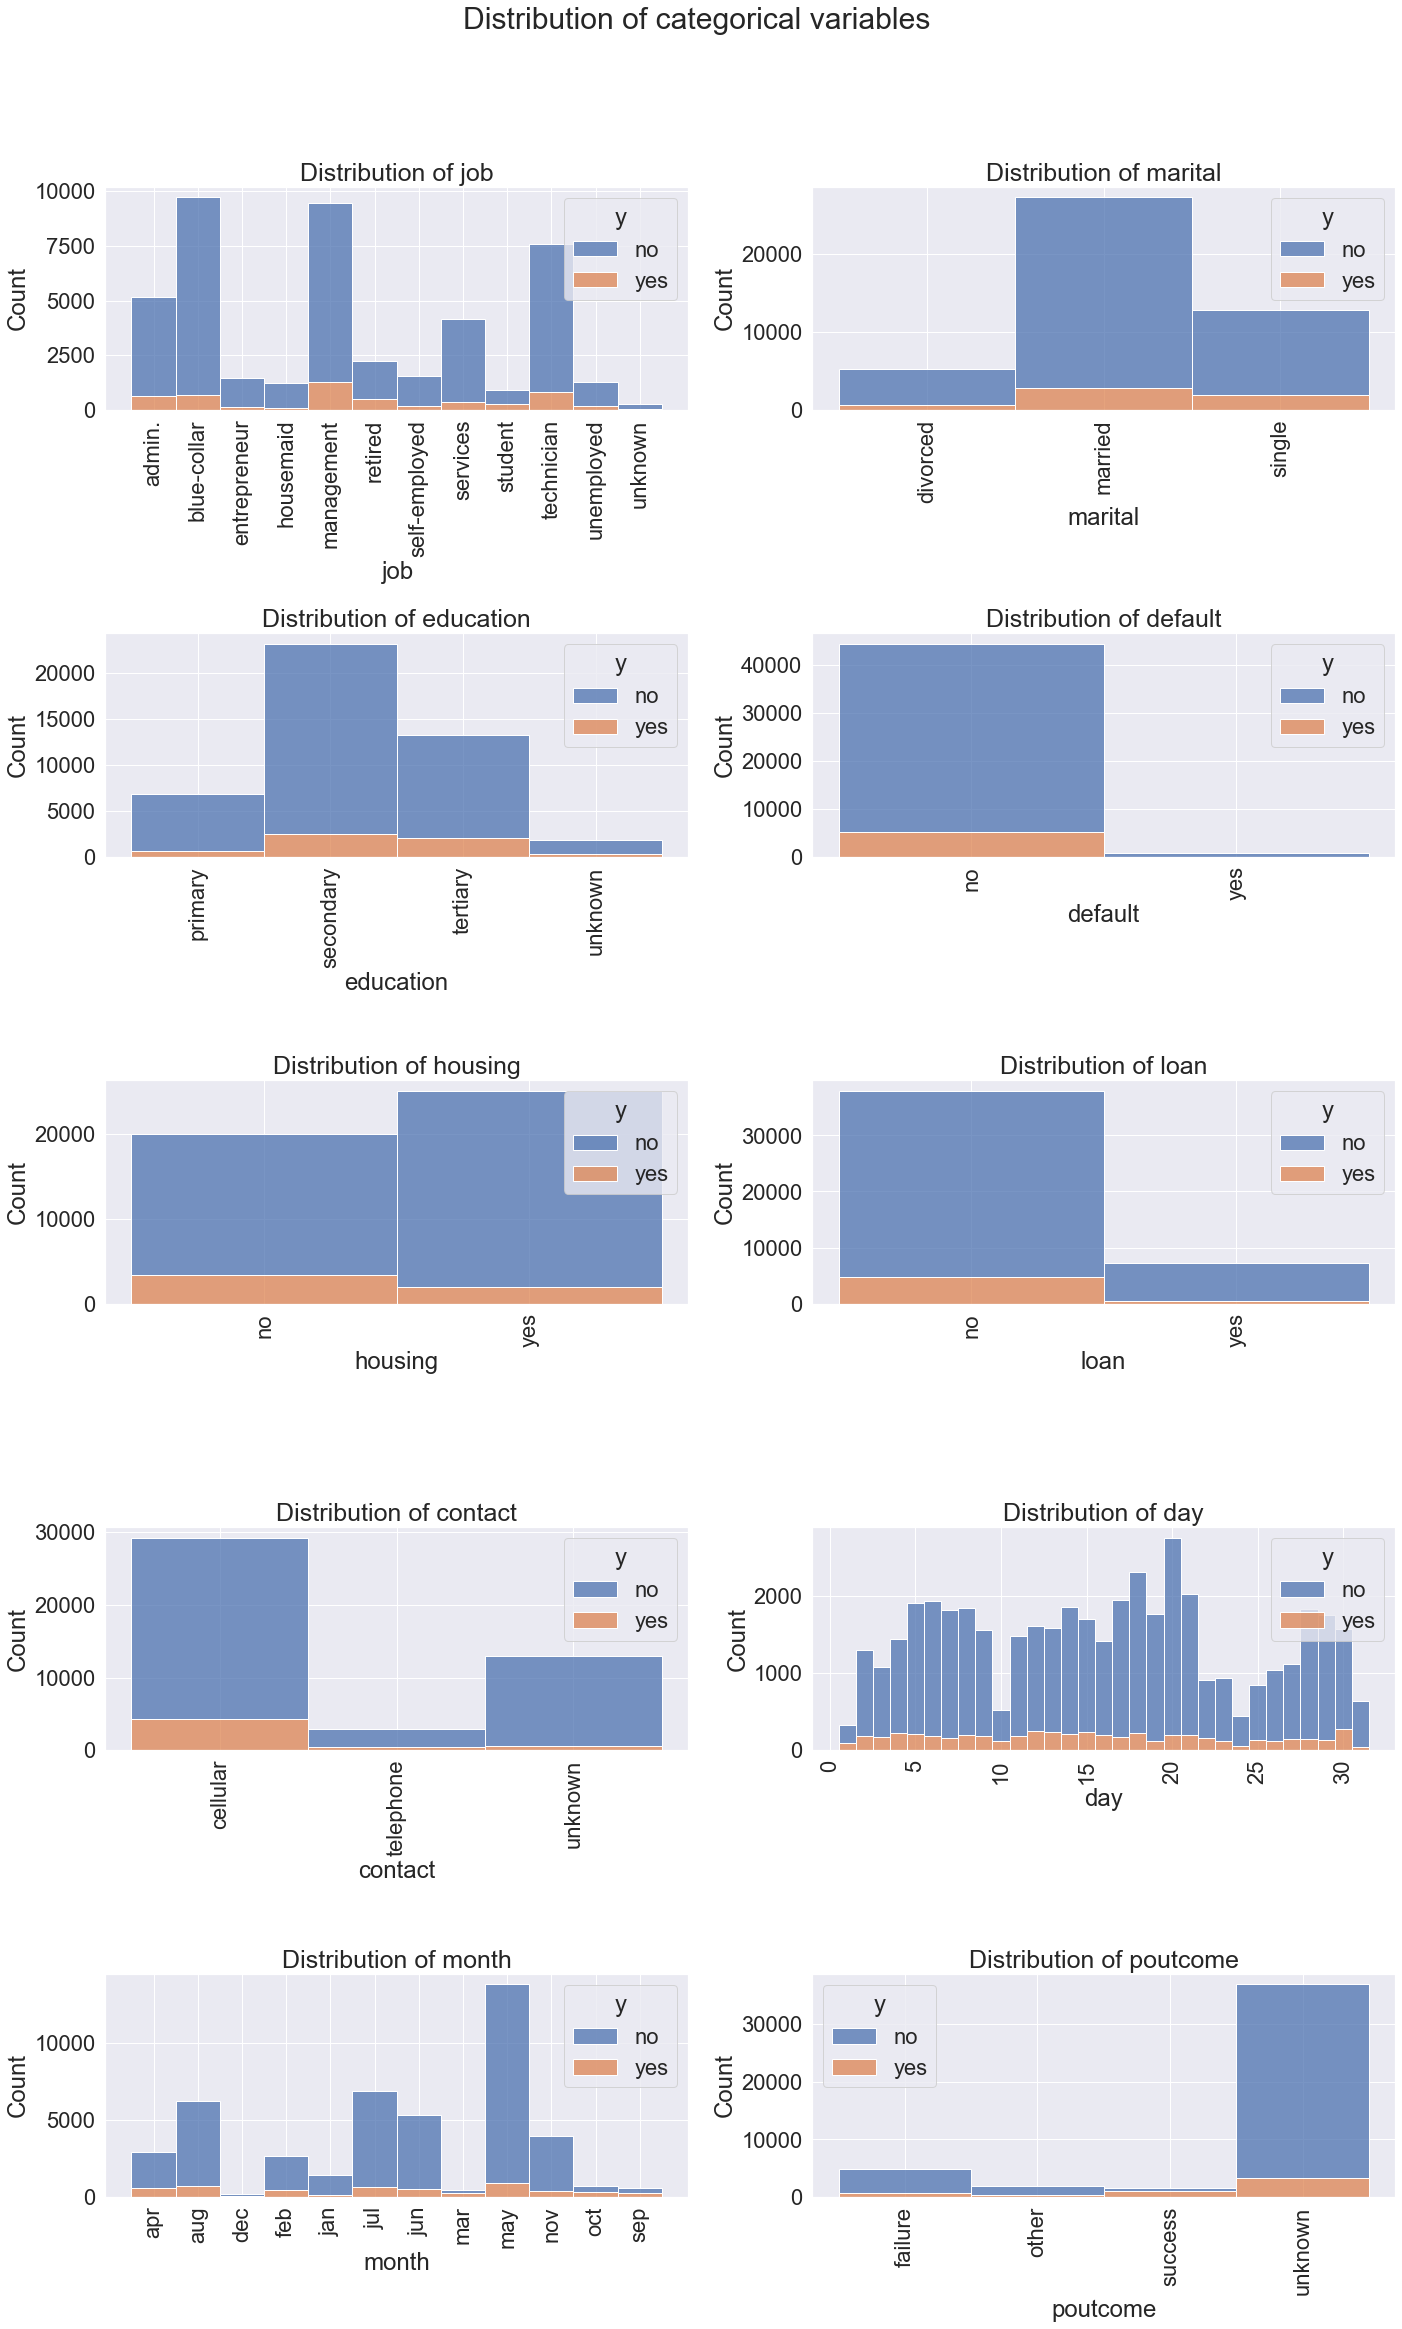

In [37]:
count = 1
plt.subplots(figsize = (20,60))    # figure size of subplots
for i in cat1:                        # for loop for getting subplots in cat1
    for j in cat2:                 # for loop for getting subplots in cat2
        plt.subplot(10, 2, count)     # subplots in rows and columns
        ax = plt.gca()             # get current axes 
        sns.set(font_scale = 2)       # get scale for font    
        sns.histplot(data=bank_mrkting, x=bank_mrkting[i], hue=bank_mrkting[j], multiple="stack")   # histoplot
        plt.xticks(rotation=90)        # roting x axis names to horizontal
        ax.set_title('Distribution of %s'%(i), fontsize = 25)    # title to each plot
        count += 1
        plt.tight_layout()       # figure tightness/compactness
plt.suptitle('Distribution of categorical variables ', y = 1.03, fontsize = 30)    # title to whole plot 
plt.show() # show plot

**Observations :**<br>
**Categorical Vs y :**<br>
* Job : clients which are Management, technician and Blue Collar have more subscribed to term deposit.
* Marital : Married clients have  more subscribed to term deposit.
* Education : Secondary educated clients have more subscribed to term deposit.
* Default : By default who doesn't have more subscribed to term deposit.
* Housing : Most no of clients having no house loan have more subscribed to term deposit.
* Loan : Most no of clients doesn't have personal  loan have more subscribed to term deposit.
* Contact : Most no of clients having Cellular contact have more subscribed to term deposit.
* Day : No of clients come on 30, 18, 12, 13  day have more subscribed to term deposit.
* Month : No of clients come on May, July and August month have more subscribed to term deposit.
* Poutcome : Clients Unknown which are  in this current campaigns have more subscribed to term deposit.

## Campaign 1 Visualisation   

In [38]:
campaign_1 = bank_mrkting[bank_mrkting.poutcome != 'unknown'] # 'unknown' valuesare missing for campaign 1 so not add in campaign_1
campaign_2 = bank_mrkting[bank_mrkting.poutcome == 'unknown'] # 'unknown'  for campaign 2 so  add in campaign_2

###  Categorical Variables

In [39]:
cat3 = ['job', 'marital', 'education', 'default','housing','loan', 'contact', 'day', 'month'] # list of categorical variables

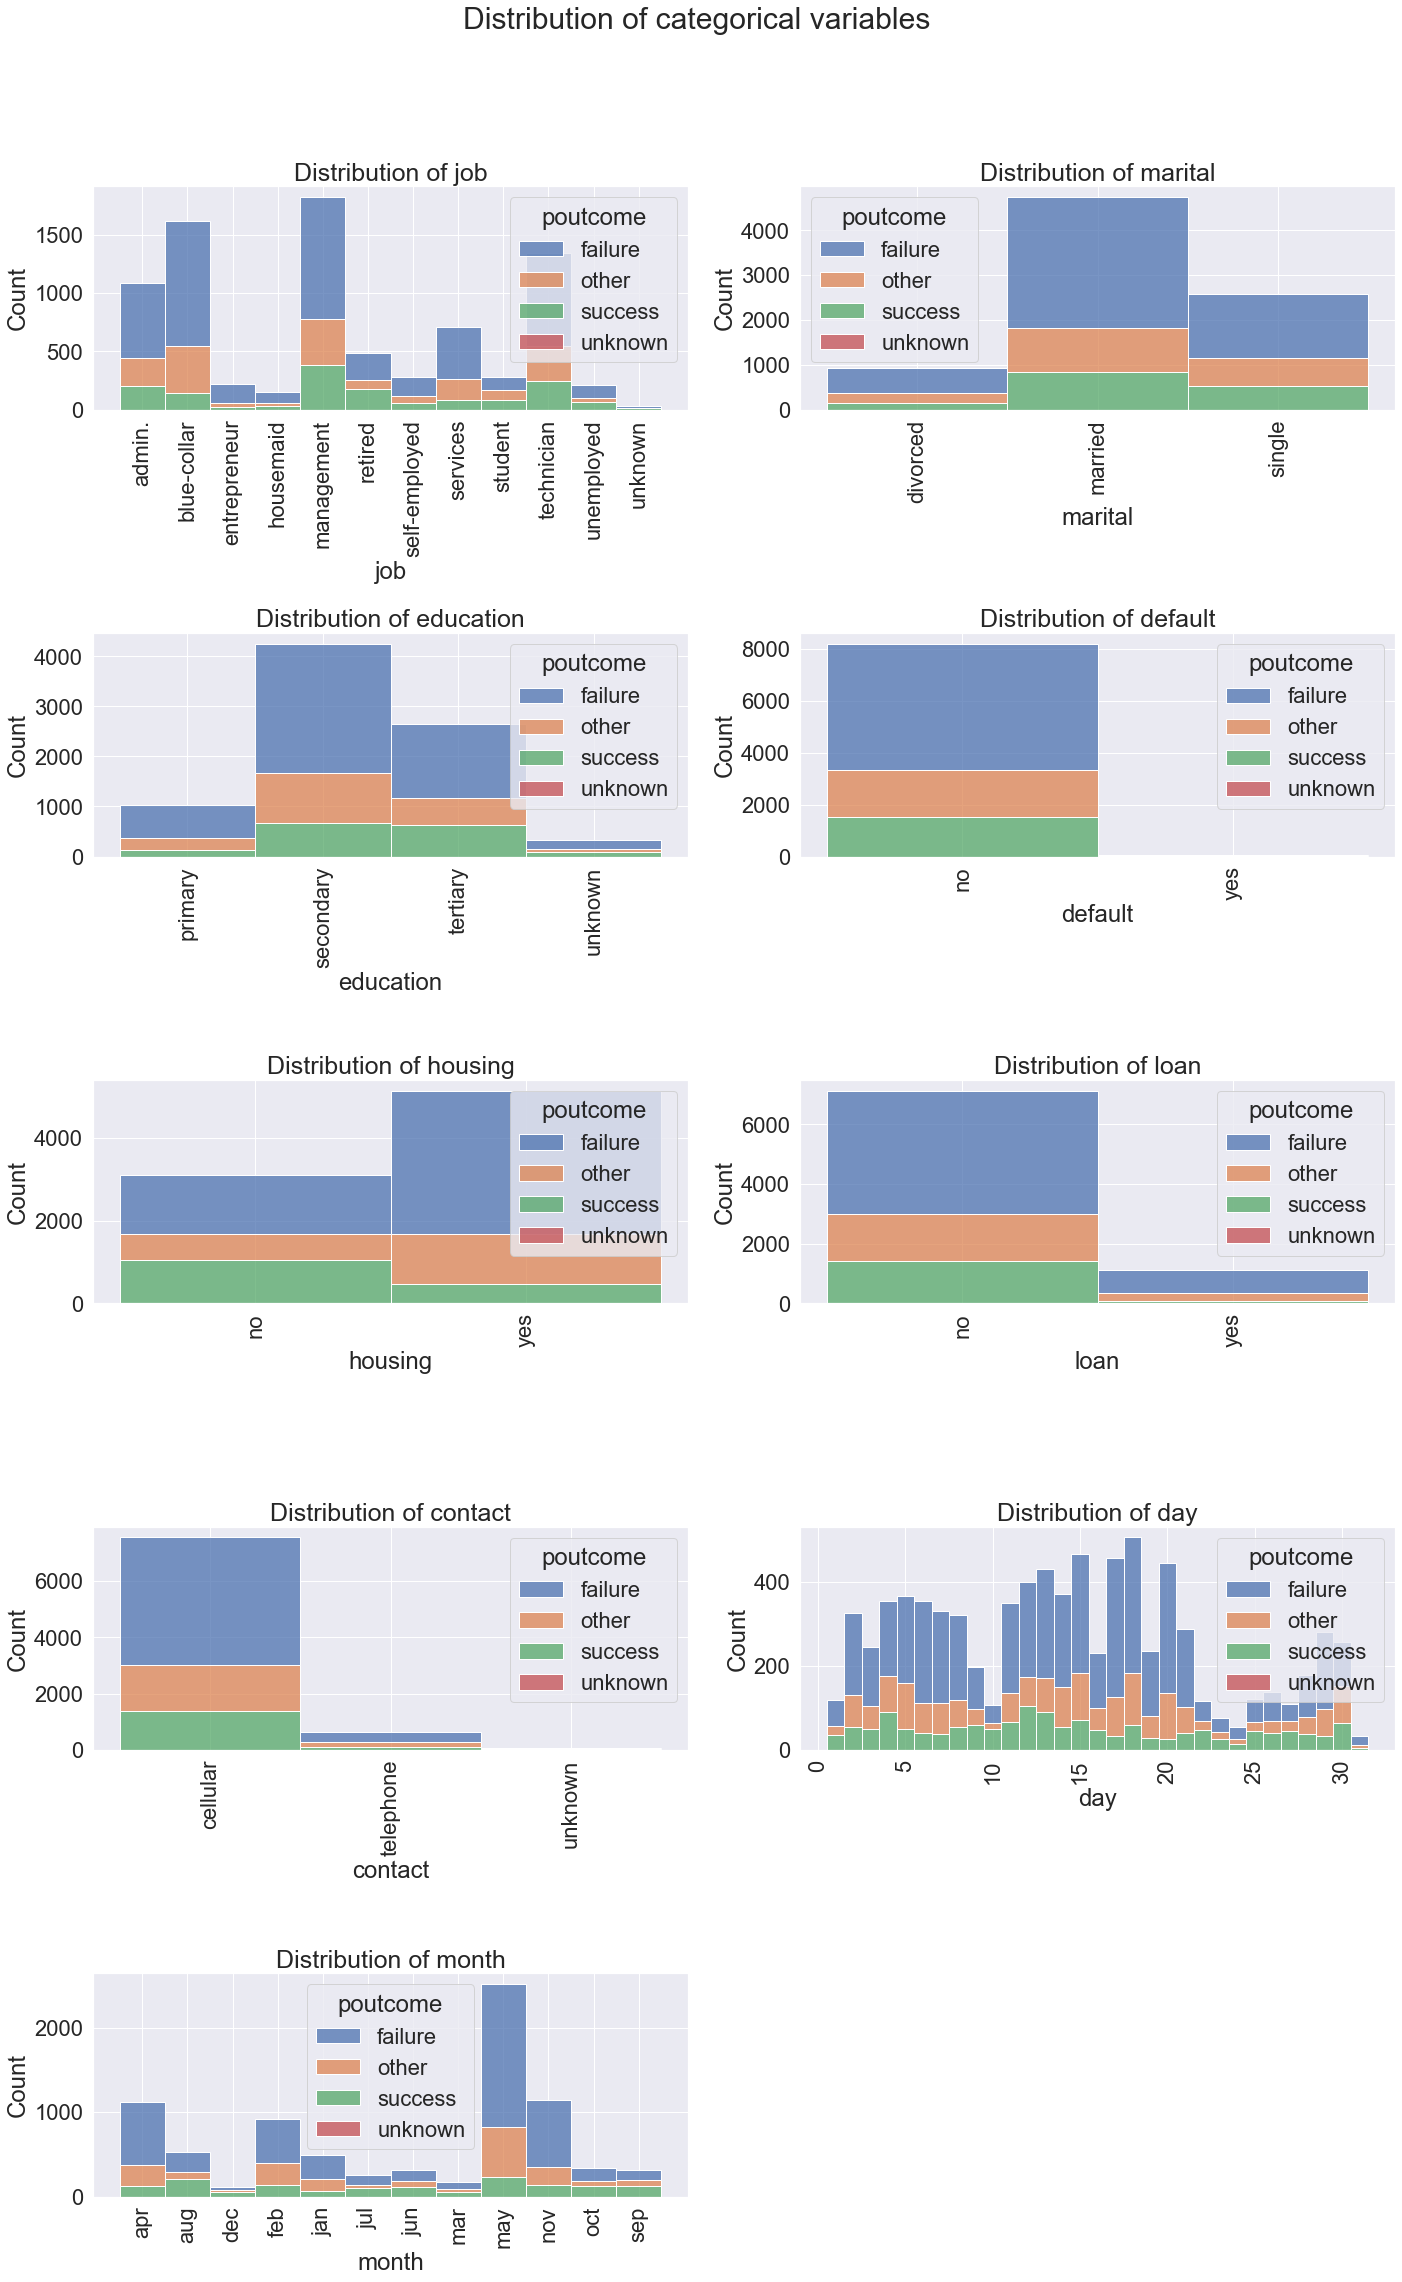

In [40]:
count = 1
plt.subplots(figsize = (20,60))   # figure size of subplots
for i in cat3:                     # for loop for getting subplots
        plt.subplot(10, 2, count)    #   subplots in rows and columns 
        ax = plt.gca()               # get current axes
        sns.set(font_scale = 2)        # get scale for fonts 
        sns.histplot(data=campaign_1, x=campaign_1[i], hue='poutcome', multiple="stack")  # histo plot
        plt.xticks(rotation=90)          # rotating x axis names to horizontal 
        ax.set_title('Distribution of %s'%(i), fontsize = 25)  # title to each plot 
        count += 1
        plt.tight_layout()    # figure tightness/compactness
plt.suptitle('Distribution of categorical variables ', y = 1.03, fontsize = 30)  # title to whole plot
plt.show()  # show plot 

**Observations :**<br>
**Campaign 1 :**<br>
* Job : clients which are Technician, Management have responded positively.
* Marital : Married clients have  responded well.
* Education : Secondary educated clients have responded positively.
* Default : By default who doesn't have responded positively.
* Housing : Most no of clients having no house loan have responded positively.
* Loan : Most no of clients doesn't have personal  loan have responded positively.
* Contact : Most no of clients having Cellular contact have responded positively.
* Day : No of clients come on 12, 13  day have responded positively.
* Month : No of clients come on May month have more subscribed to term deposit.

### Numerical variables 

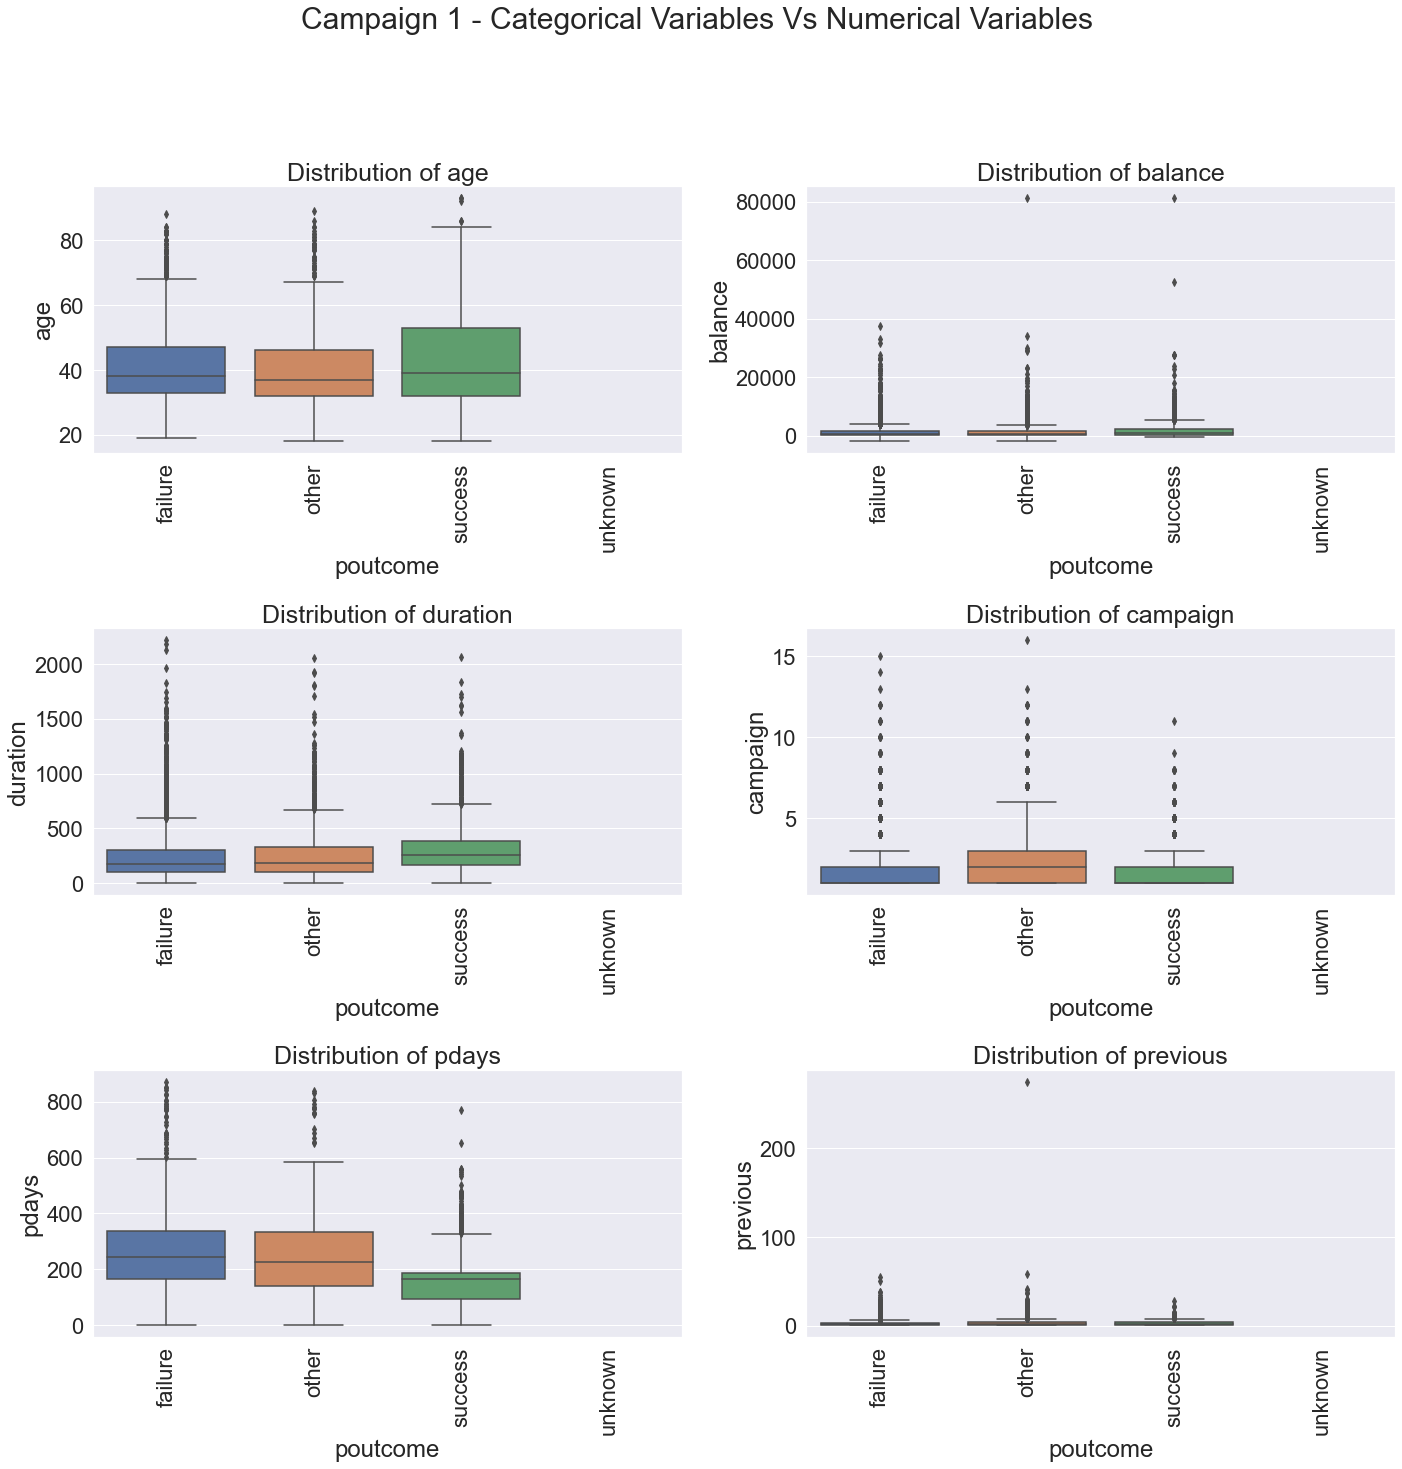

In [41]:
count = 1
plt.subplots(figsize = (20,60))   # figure size of subplots 
for i in nums:                     # for loop for getting subplots
        plt.subplot(10, 2, count)    # subplots in rows and columns 
        ax = plt.gca()      #  get current axes 
        sns.set(font_scale = 2)    # scale for fonts
        sns.boxplot(x='poutcome',y=campaign_1[i],data=campaign_1)   # box plot
        plt.xticks(rotation=90)  # rotation of x axis names to horizontal
        ax.set_title('Distribution of %s'%(i), fontsize = 25)   # title to each subplots
        count += 1
        plt.tight_layout()   # figure tightness/compactness
plt.suptitle('Campaign 1 - Categorical Variables Vs Numerical Variables ', y = 1.03, fontsize = 30)  #title to whole part
plt.show() # show plot

**Observations :**<br>
**Campaign 1 :**<br>
* Age : clients which are in large age have responded positively.
* Balance : Clients have high balance are responded well.
* Duration : Higher duration of calls  have responded positively.
* pdays : Lesser day between communication give more positive result.

##  Campaign 2 Visualisation

### Categorical Variables

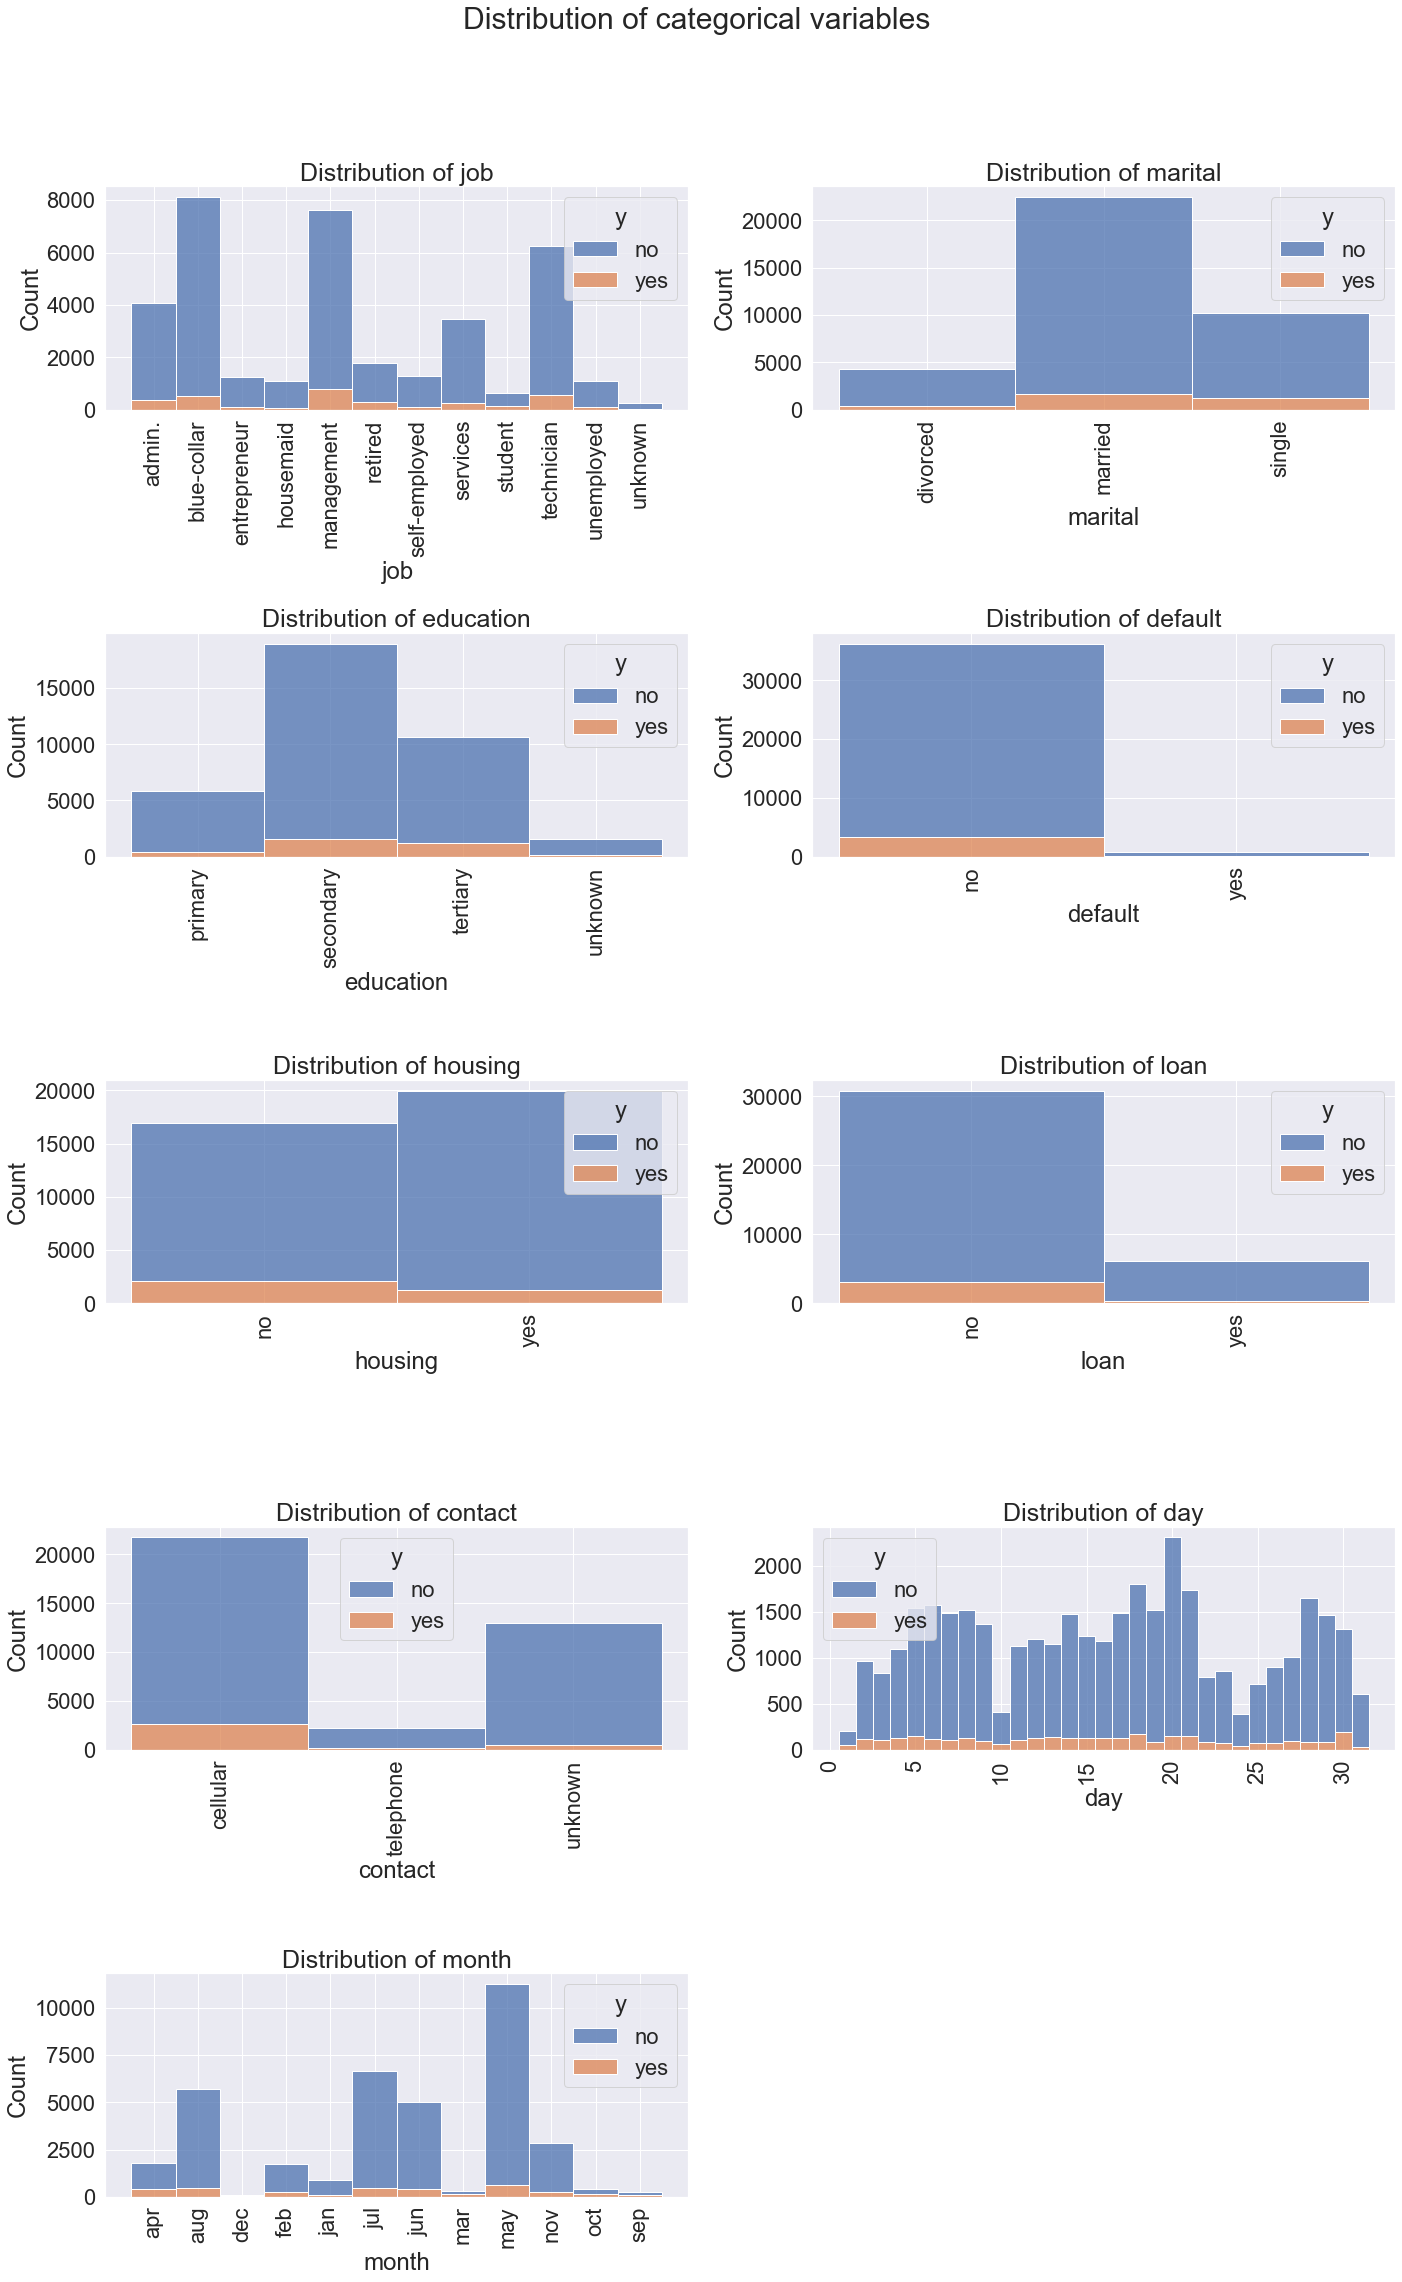

In [42]:
count = 1
plt.subplots(figsize = (20,60))   # figure size of subplots
for i in cat3:                     # for loop for getting subplots
        plt.subplot(10, 2, count)    #   subplots in rows and columns 
        ax = plt.gca()               # get current axes
        sns.set(font_scale = 2)        # get scale for fonts 
        sns.histplot(data=campaign_2, x=campaign_2[i], hue='y', multiple="stack")  # histo plot
        plt.xticks(rotation=90)          # rotating x axis names to horizontal 
        ax.set_title('Distribution of %s'%(i), fontsize = 25)  # title to each plot 
        count += 1
        plt.tight_layout()    # figure tightness/compactness
plt.suptitle('Distribution of categorical variables ', y = 1.03, fontsize = 30)  # title to whole plot
plt.show()  # show plot 

**Observations :**<br>
**Campaign 2 :**<br>
* Job : clients which are Technician, Management have responded positively.
* Marital : Married clients have  responded well.
* Education : Secondary educated clients have responded positively.
* Default : By default who doesn't have responded positively.
* Housing : Most no of clients having no house loan have responded positively.
* Loan : Most no of clients doesn't have personal  loan have responded positively.
* Contact : Most no of clients having Cellular contact have responded positively.
* Day : No of clients come on 18, 20  day have responded positively.
* Month : No of clients come on May month have more subscribed to term deposit.

###  Numerical Variables

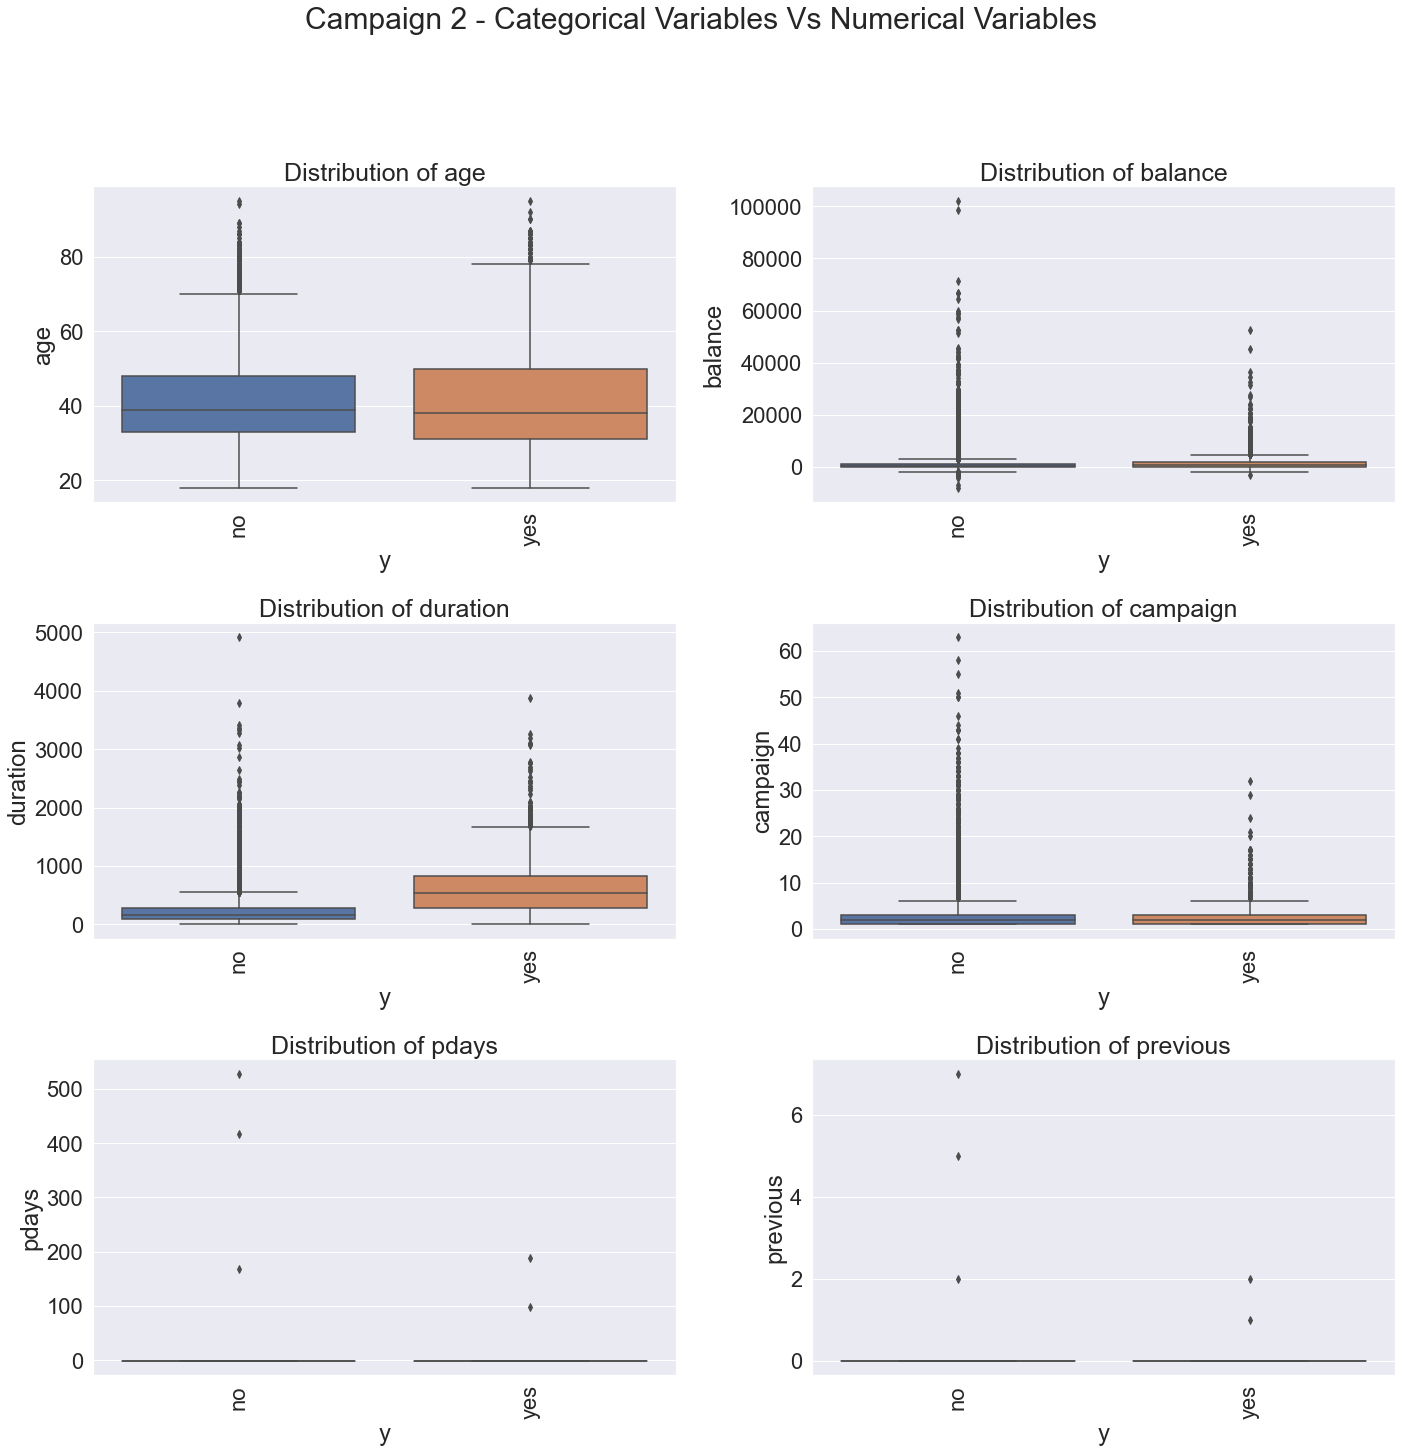

In [43]:
count = 1
plt.subplots(figsize = (20,60))   # figure size of subplots  
for i in nums:              #for loop for getting subplots
        plt.subplot(10, 2, count)   # subplots in wows And columns
        ax = plt.gca()     # get current axes
        sns.set(font_scale = 2)   # scale for fonts
        sns.boxplot(x='y',y=campaign_2[i],data=campaign_2)  # box plot
        plt.xticks(rotation=90)  # rotate x axis names to horizontal  
        ax.set_title('Distribution of %s'%(i), fontsize = 25)  # title to each plot
        count += 1
        plt.tight_layout()  # figure tightness/compactness
plt.suptitle('Campaign 2 - Categorical Variables Vs Numerical Variables', y = 1.03, fontsize = 30)  # title to whole plot
plt.show() # show plot

**Observations :**<br>
**Campaign 2 :**<br>
* Age : clients which are in large age have responded positively.
* Balance : Clients have high balance are responded well.
* Duration : Higher duration of calls  have responded positively.

## Campaign Performance

In [44]:
Campaign_1_performance_rate = (campaign_1.poutcome=='success').sum()/len(campaign_1)*100   # find percent preformance rate campaign1 
Campaign_2_performance_rate = (campaign_2.y=='yes').sum()/len(campaign_2)*100# find percent preformance rate campaign 2
print("Campaign_1_performance_rate :", Campaign_1_performance_rate)  # print campaign 1 performance
print("Campaign_2_performance_rate :", Campaign_2_performance_rate)# print campaign 1 performance

Campaign_1_performance_rate : 18.310712554532234
Campaign_2_performance_rate : 9.161503287426607


**Obervation :**<br>
* Campaign 1 Performance is better than Campaign 2 Performance

## Campaign_1_failure and Campaign_2_no_response

In [45]:
campaign_1_failure = campaign_1[campaign_1.poutcome =='failure']# giving campaign 1 failure with help of poutcome variable
campaign_2_no_response = campaign_2[campaign_2.y=='no']# giving campaign 2  no response with help of y variable

### Campaign_1_failure

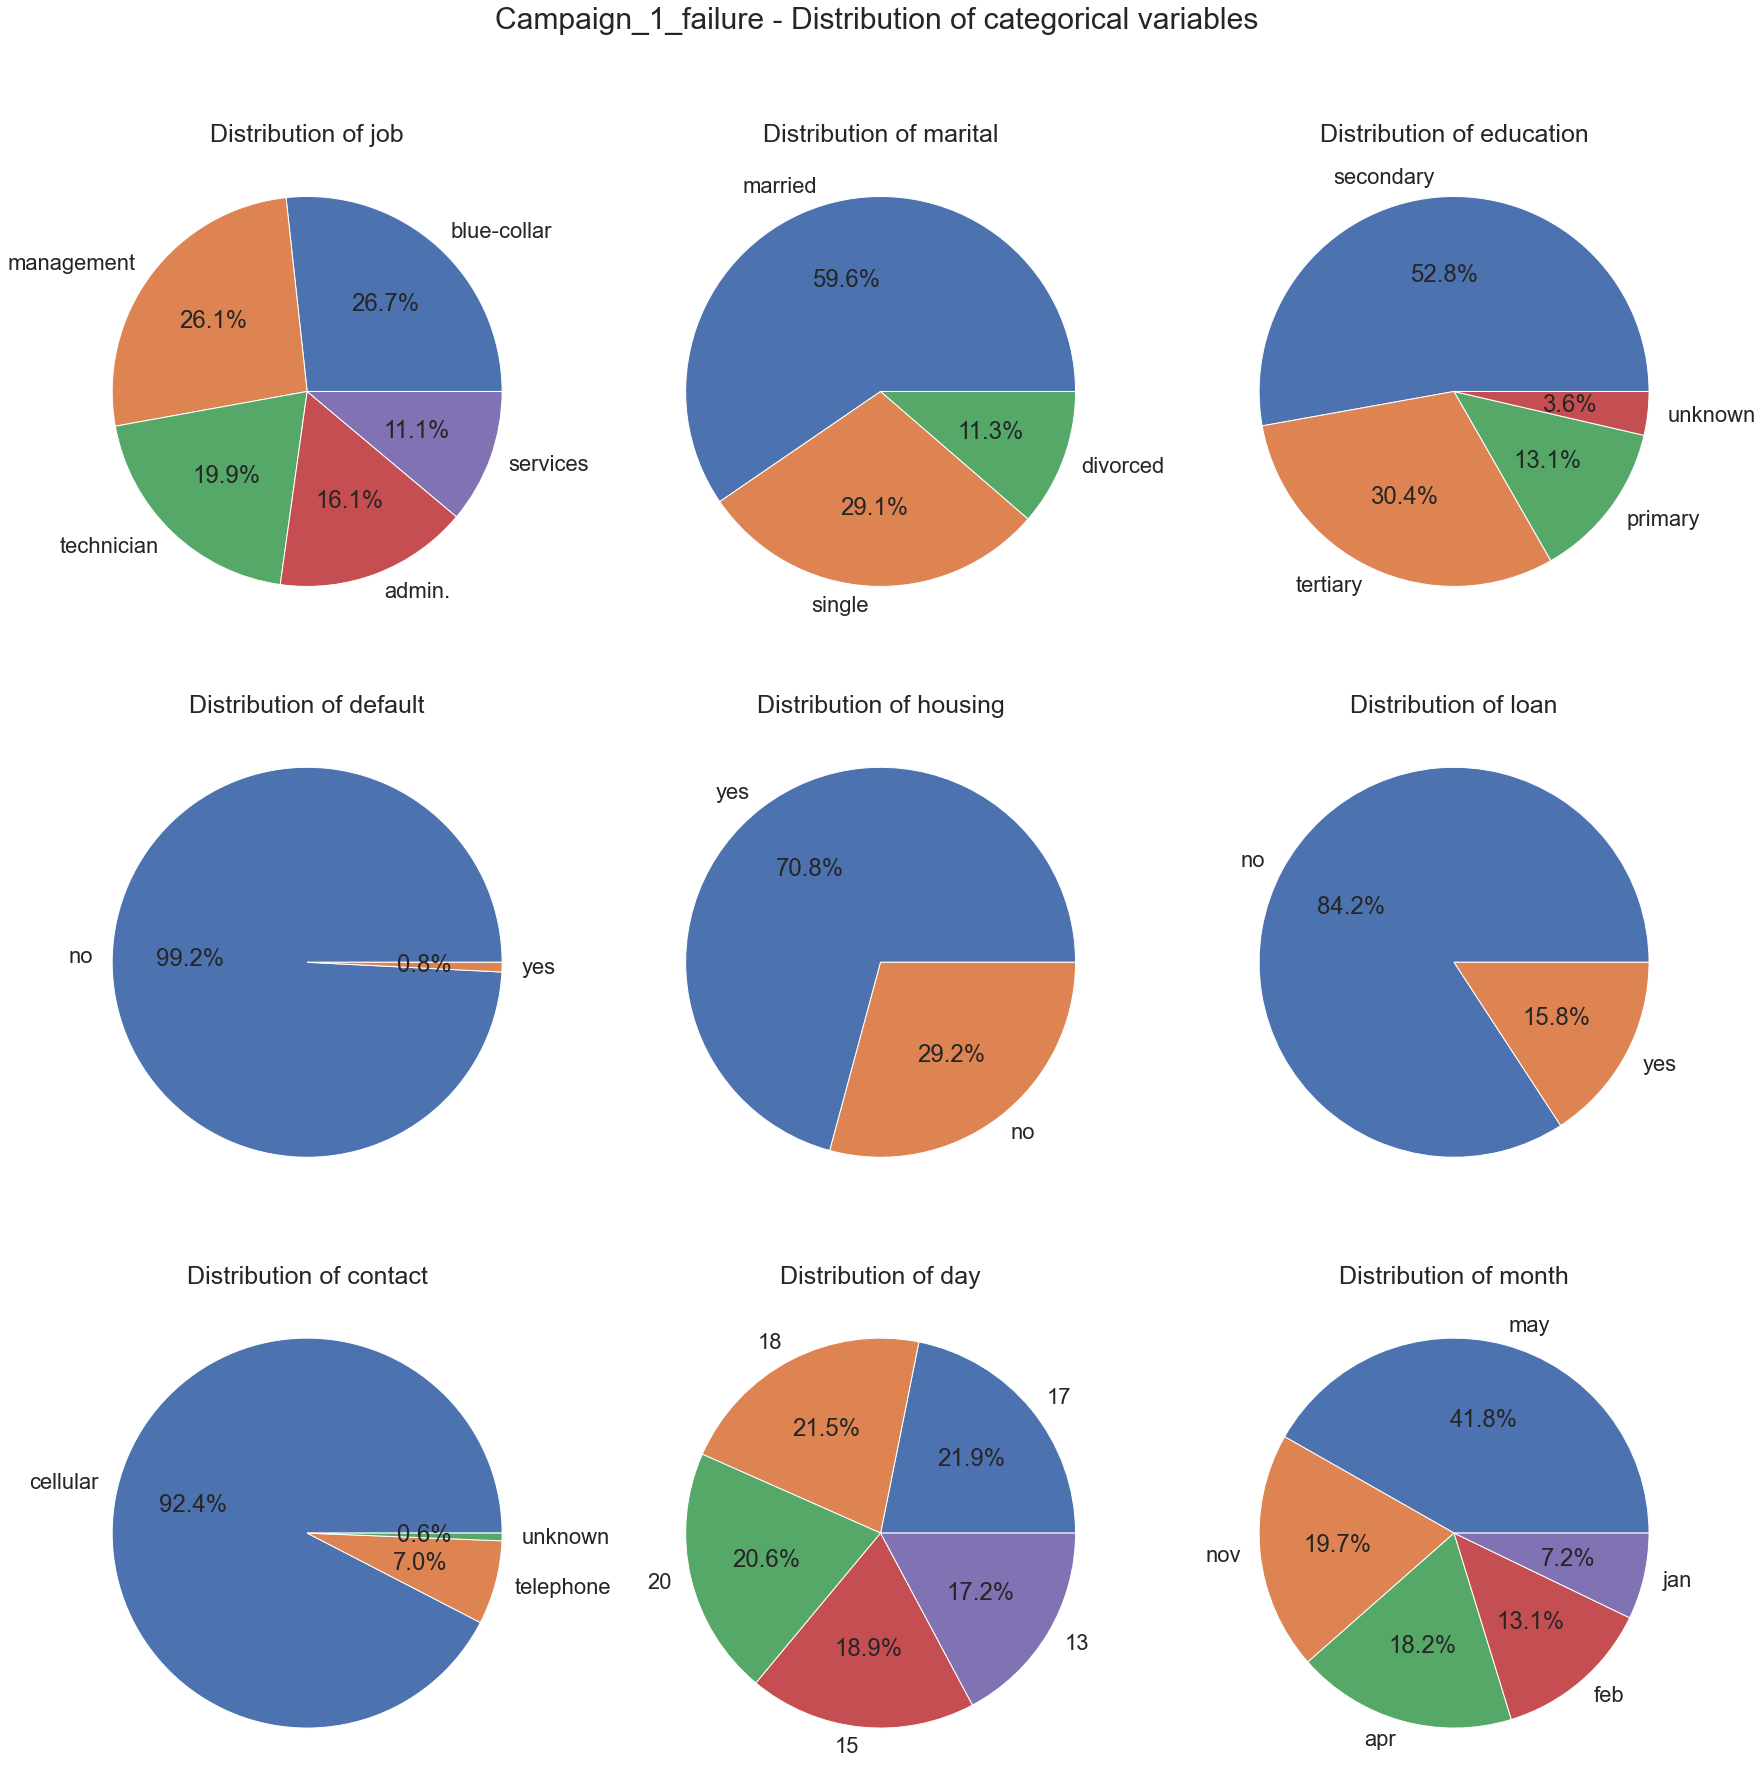

In [46]:
count = 1
plt.subplots(figsize = (25,40))  # figure size pof subplots
for i in cat3:   # for loop for getting subplots
    plt.subplot(5, 3, count)  # subplots in rows and columns 
    ax = plt.gca()   # get current axes
    sns.set(font_scale = 2)   # scale for fonts     # pie plot below
    plt.pie(campaign_1_failure[i].value_counts().values[:5], labels=campaign_1_failure[i].value_counts().index[:5], autopct='%1.1f%%')
    ax.set_title('Distribution of %s'%(i), fontsize = 25) # title of each subplot
    count += 1  
    plt.tight_layout()  # figure tightness/compactness 
plt.suptitle('Campaign_1_failure - Distribution of categorical variables ', y = 1.03, fontsize = 30) # title of whole plot
plt.show() # show plot

**Observations :**<br>
**Campaign_1_Failure :**<br>

* Job : For Failure, Blue_Collar are in higher percent.
* Marital : For Failure, Married clients are in high number.
* Education : Secondary education clients are high.
* Default : By default who doesn't have loan are high.
* Housing : Most no of clients have house loan.
* Loan : Most no of clients doesn't have personal  loan.
* Poutcome : did not participate in previous campaigns are high.
* Contact : Clients mostly have cellular contact.
* Day : Most of the days are 20, 18, 17
* Month : Most of the months are May, November, April.

### Campaign_2_no_response

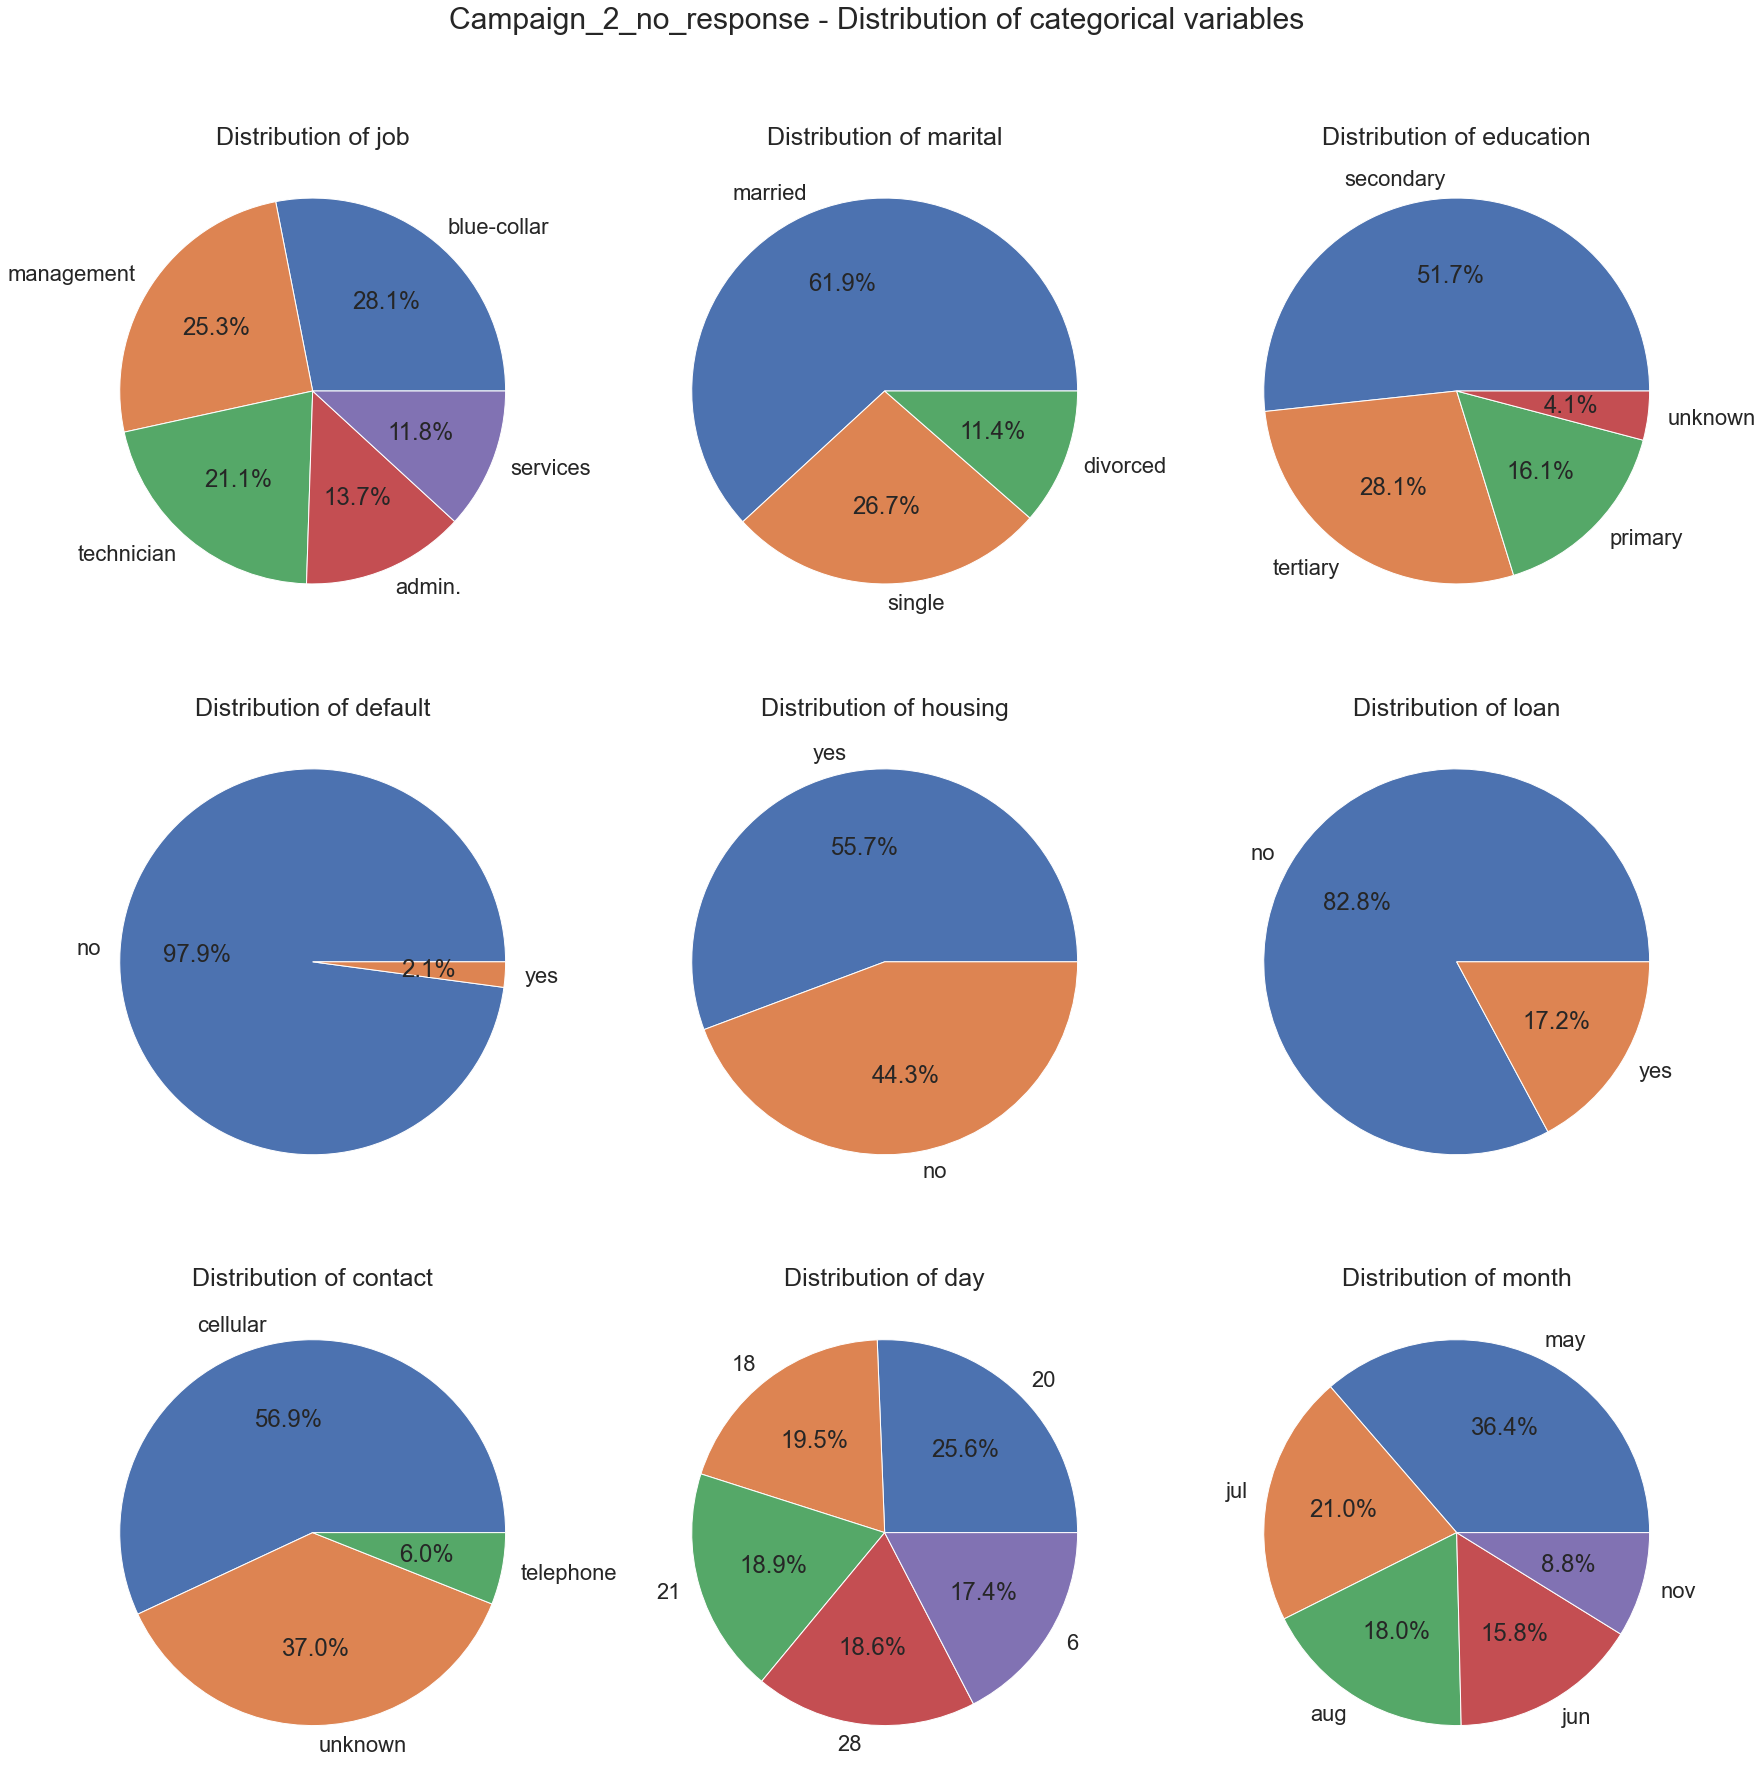

In [47]:
count = 1
plt.subplots(figsize = (25,40))   # figure size of subplots
for i in cat3:   # for loop for getting subplots
    plt.subplot(5, 3, count)   # subplots in rows and columns 
    ax = plt.gca()   # get current axes
    sns.set(font_scale = 2)    # scale for fonts                    # pie plot below
    plt.pie(campaign_2_no_response[i].value_counts().values[:5], labels=campaign_2_no_response[i].value_counts().index[:5], autopct='%1.1f%%')
    ax.set_title('Distribution of %s'%(i), fontsize = 25) # title of each plot
    count += 1
    plt.tight_layout()   # figure tightness/compactness 
plt.suptitle('Campaign_2_no_response - Distribution of categorical variables ', y = 1.03, fontsize = 30)  # title to whole plot
plt.show()  # show plot

**Observations :**<br>
**Campaign_2_no_response :**<br>

* Job : For Failure, Blue_Collar are in higher percent.
* Marital : For Failure, Married clients are in high number.
* Education : Secondary education clients are high.
* Default : By default who doesn't have loan are high.
* Housing : Most no of clients have house loan.
* Loan : Most no of clients doesn't have personal  loan.
* Poutcome : did not participate in previous campaigns are high.
* Contact : Clients mostly have cellular contact.
* Day : Most of the days are 20, 18, 21
* Month : Most of the months are May, July, August.

# Conclusion :

| |campaign_1_success     | campaign_1_failure   | 
|---:|:-----------|:------|
| 1 | Job : clients which are Technician, Management have responded positively.      |Job : For Failure, Blue_Collar are in higher percent.   | 
| 2 | Marital : Married clients have  responded well.   |Marital : For Failure, Married clients are in high number.  | 
| 3 | Education : Secondary educated clients have responded positively.   |Education : Secondary education clients are high.    |
| 4 | Default : By default who doesn't have responded positively.   |Default : By default who doesn't have loan are high.    | 
| 5 | Housing : Most no of clients having no house loan have responded positively.    |Housing : Most no of clients have house loan.   | 
| 6 | Loan : Most no of clients doesn't have personal  loan have responded positively.    |Loan : Most no of clients doesn't have personal  loan.    | 
| 7 | Contact : Most no of clients having Cellular contact have responded positively.    |Contact : Clients mostly have cellular contact.     | 
| 8 | Day : No of clients come on 12, 13  day have responded positively.   |Day : Most of the days are 20, 18, 17    | 
| 9 | Month : No of clients come on May month have more subscribed to term deposit.     |Month : Most of the months are May, November, April.    | 
| 10 | Age : clients which are in large age have responded positively.    |Poutcome : did not participate in previous campaigns are high.   | 
| 11 | Balance : Clients have high balance are responded well.    |   | 
| 12 | Duration : Higher duration of calls  have responded positively.    |  | 
| 13 | pdays : Lesser day between communication give more positive result.    |  |




| |campaign_2_response     | campaign_2_no_response   | 
|---:|:-----------|:------|
| 1 | Job : clients which are Technician, Management have responded positively.      |Job : For Failure, Blue_Collar are in higher percent.   | 
| 2 | Marital : Married clients have  responded well.   |Marital : For Failure, Married clients are in high number.  | 
| 3 | Education : Secondary educated clients have responded positively.   |Education : Secondary education clients are high.    |
| 4 | Default : By default who doesn't have responded positively.   |Default : By default who doesn't have loan are high.    | 
| 5 | Housing : Most no of clients having no house loan have responded positively.    |Housing : Most no of clients have house loan.   | 
| 6 | Loan : Most no of clients doesn't have personal  loan have responded positively.    |Loan : Most no of clients doesn't have personal  loan.    | 
| 7 | Contact : Most no of clients having Cellular contact have responded positively.    |Contact : Clients mostly have cellular contact.     | 
| 8 | Day : No of clients come on 18, 20  day have responded positively.   |Day : Most of the days are 20, 18, 21    | 
| 9 | Month : No of clients come on May month have more subscribed to term deposit.     |Month : Most of the months are May, July, August.    | 
| 10 | Age : clients which are in large age have responded positively.    |Poutcome : did not participate in previous campaigns are high.   | 
| 11 | Balance : Clients have high balance are responded well.    |   | 
| 12 | Duration : Higher duration of calls  have responded positively.    |  | 





Some numericals features are not normally distributed even after applying transformations. Thus we have to go for non-      parametric approach in machine learning(ML).

